In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
file_path = '/Users/shaunmckellarjr/Desktop/Shaun_Projects/Movie_Recommender/movies2.csv'
movies_df = pd.read_csv(file_path)

In [3]:
movies_df.head()

id            original_title  \
0  278  The Shawshank Redemption   
1  238             The Godfather   
2  240     The Godfather Part II   
3  424          Schindler's List   
4  389              12 Angry Men   

                                            overview release_date  popularity  \
0  Imprisoned in the 1940s for the double murder ...   1994-09-23     116.038   
1  Spanning the years 1945 to 1955, a chronicle o...   1972-03-14     167.834   
2  In the continuing saga of the Corleone crime f...   1974-12-20     164.908   
3  The true story of how businessman Oskar Schind...   1993-12-15      77.039   
4  The defense and the prosecution have rested an...   1957-04-10      76.566   

   vote_average  vote_count                  genre_names  
0         8.705       26221           ['Drama', 'Crime']  
1         8.695       19877           ['Drama', 'Crime']  
2         8.576       12001           ['Drama', 'Crime']  
3         8.567       15409  ['Drama', 'History', 'War']  
4         8.541        8276                    ['Drama']

In [4]:
missing_values = movies_df.isnull().sum()

In [5]:
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
id                0
original_title    0
overview          1
release_date      0
popularity        0
vote_average      0
vote_count        0
genre_names       0
dtype: int64


In [6]:
data_types = movies_df.dtypes
print("nData Types of Each Column:")
print(data_types)

nData Types of Each Column:
id                  int64
original_title     object
overview           object
release_date       object
popularity        float64
vote_average      float64
vote_count          int64
genre_names        object
dtype: object


In [7]:
duplicates = movies_df.duplicated().sum()
print("\nNumber of Duplicate Rows")
print (duplicates)


Number of Duplicate Rows
48


In [8]:
summary_statistics = movies_df.describe()
print("\nSummary Stats of Numerical Columns:")
print(summary_statistics)


Summary Stats of Numerical Columns:
                 id   popularity  vote_average    vote_count
count  9.400000e+03  9400.000000   9400.000000   9400.000000
mean   1.886253e+05    42.855597      6.636562   1971.110319
std    2.501381e+05    90.352175      0.782143   3092.303425
min    2.000000e+00     0.020000      3.270000    300.000000
25%    1.004650e+04    16.841750      6.114750    466.000000
50%    3.665250e+04    24.360500      6.658000    842.000000
75%    3.440978e+05    38.226000      7.200000   1966.000000
max    1.212073e+06  3629.389000      8.705000  35768.000000


In [9]:
movies_df['release_date']= pd.to_datetime(movies_df['release_date'],
              errors='coerce')

movies_df.drop_duplicates(inplace=True)

In [11]:
movies_df.drop_duplicates(inplace=True)

In [12]:
print("\nCleaned Data info:")
print(movies_df.info)


Cleaned Data info:
<bound method DataFrame.info of           id                 original_title  \
0        278       The Shawshank Redemption   
1        238                  The Godfather   
2        240          The Godfather Part II   
3        424               Schindler's List   
4        389                   12 Angry Men   
...      ...                            ...   
9395    9544                     FearDotCom   
9396  485774                 The Open House   
9397   10870                     Les Dalton   
9398   74849  The Star Wars Holiday Special   
9399    5491              Battlefield Earth   

                                               overview release_date  \
0     Imprisoned in the 1940s for the double murder ...   1994-09-23   
1     Spanning the years 1945 to 1955, a chronicle o...   1972-03-14   
2     In the continuing saga of the Corleone crime f...   1974-12-20   
3     The true story of how businessman Oskar Schind...   1993-12-15   
4     The defense and t

#Explatory Data Analysis

In [14]:
# Flattening the list of genres and count occurrences
genre_list = movies_df['genre_names'].apply(ast.literal_eval).explode()
genre_counts = Counter(genre_list)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


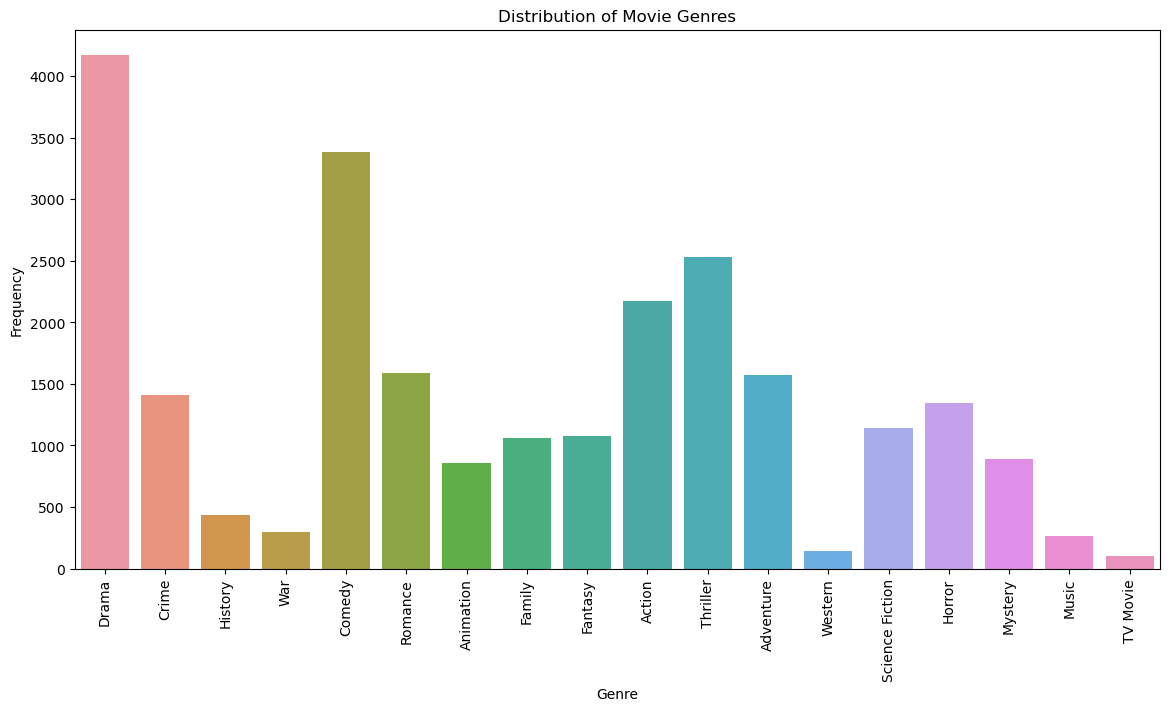

In [15]:
# Plotting the genre distribution
plt.figure(figsize=(14, 7))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

In [16]:
correlation_matrix = movies_df[['popularity', 'vote_average', 'vote_count']].corr()

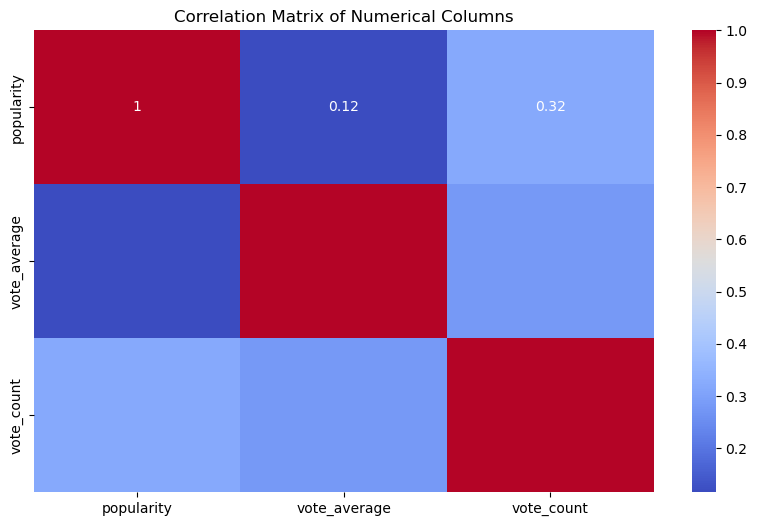

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

#Pair Plots

In [19]:
# Detecting outliers
popularity_threshold = movies_df['popularity'].quantile(0.99)
vote_count_threshold = movies_df['vote_count'].quantile(0.99)

outliers = movies_df[(movies_df['popularity'] > popularity_threshold) | 
                     (movies_df['vote_count'] > vote_count_threshold)]

print(outliers[['original_title', 'popularity', 'vote_count', 'vote_average']])

                original_title  popularity  vote_count  vote_average
0     The Shawshank Redemption     116.038       26221         8.705
1                The Godfather     167.834       19877         8.695
7              The Dark Knight      95.154       31978         8.515
8                          기생충      89.722       17573         8.509
9               The Green Mile      88.370       16851         8.500
...                        ...         ...         ...           ...
7733                       xXx     465.010        4068         5.933
7789             Suicide Squad     253.650       20668         5.913
8153               Judge Dredd     486.121        2340         5.786
8503                Madame Web     482.394        1359         5.611
8895              Ghostbusters     571.572        6236         5.358

[171 rows x 4 columns]


#Popularity vs. Rating Analysis

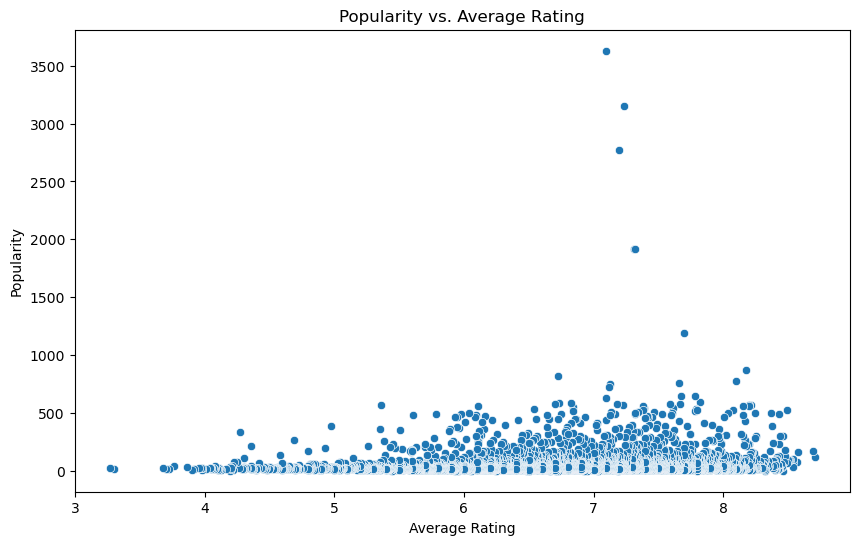

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=movies_df)
plt.title('Popularity vs. Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.show()

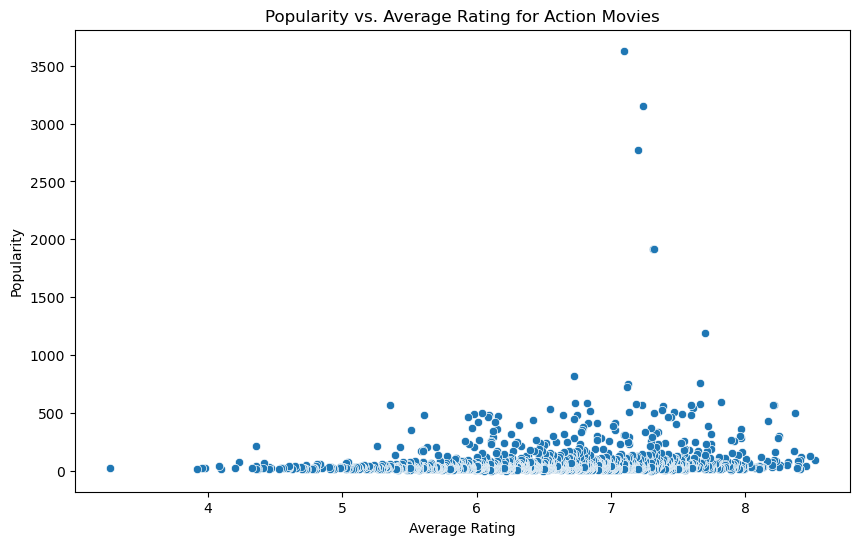

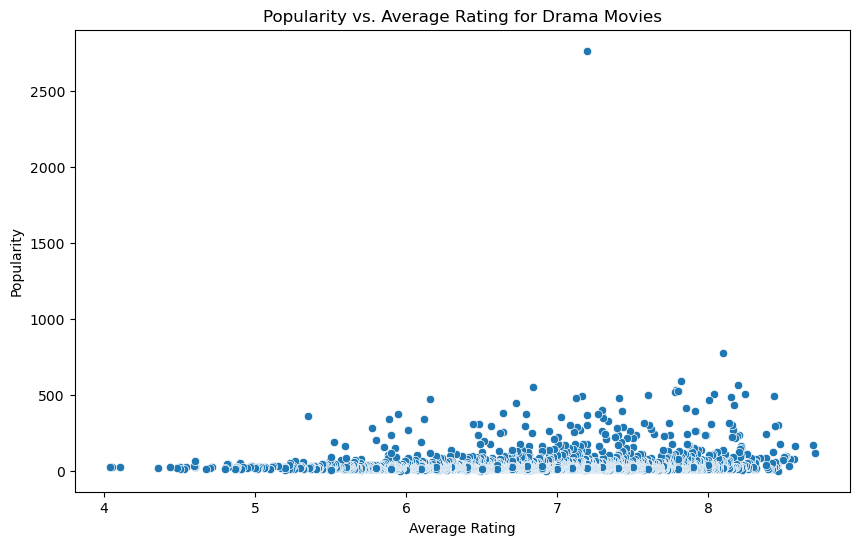

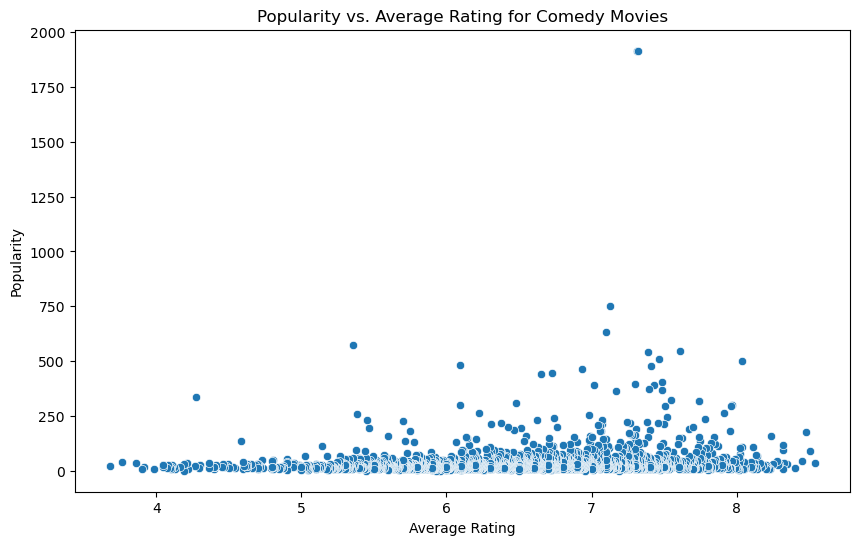

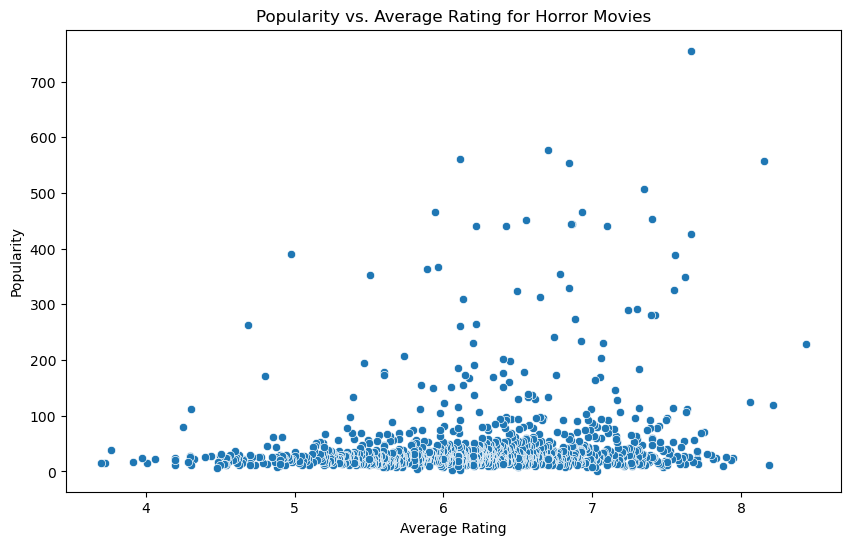

In [22]:
genres = ['Action', 'Drama', 'Comedy', 'Horror']  # Modify based on your dataset
for genre in genres:
    genre_movies = movies_df[movies_df['genre_names'].str.contains(genre)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='vote_average', y='popularity', data=genre_movies)
    plt.title(f'Popularity vs. Average Rating for {genre} Movies')
    plt.xlabel('Average Rating')
    plt.ylabel('Popularity')
    plt.show()

In [23]:
# Ensure release_date is in datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

In [24]:
# Extract year and calculate decade
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['decade'] = (movies_df['release_year'] // 10) * 10

In [25]:
# List of decades and genres to analyze
decades = movies_df['decade'].dropna().unique()
genres = ['Action', 'Drama', 'Horror', 'Comedy']

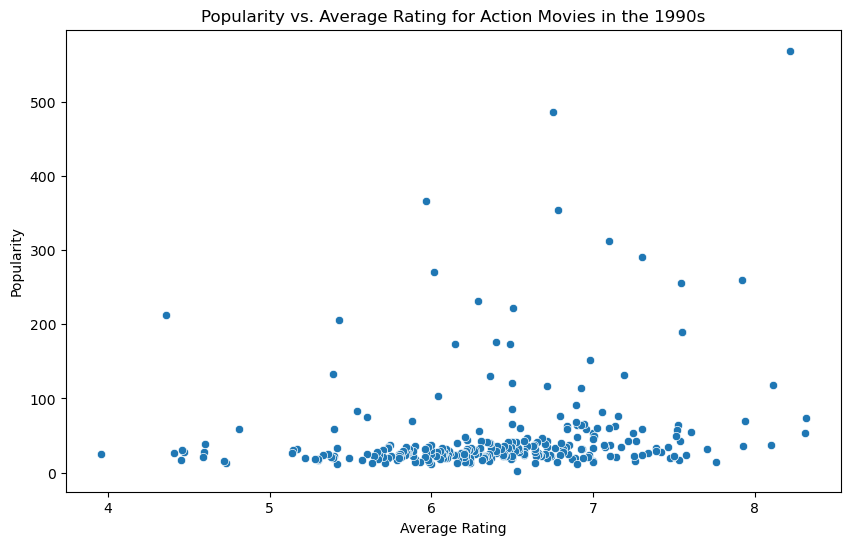

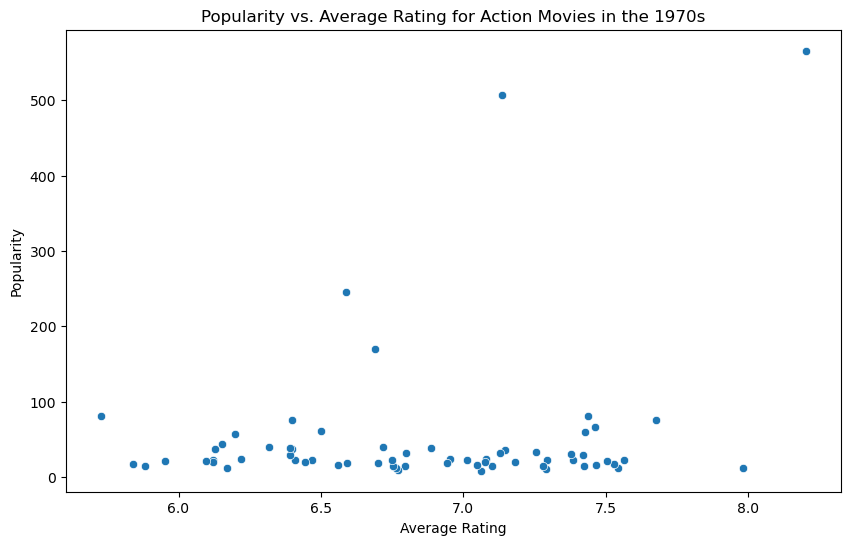

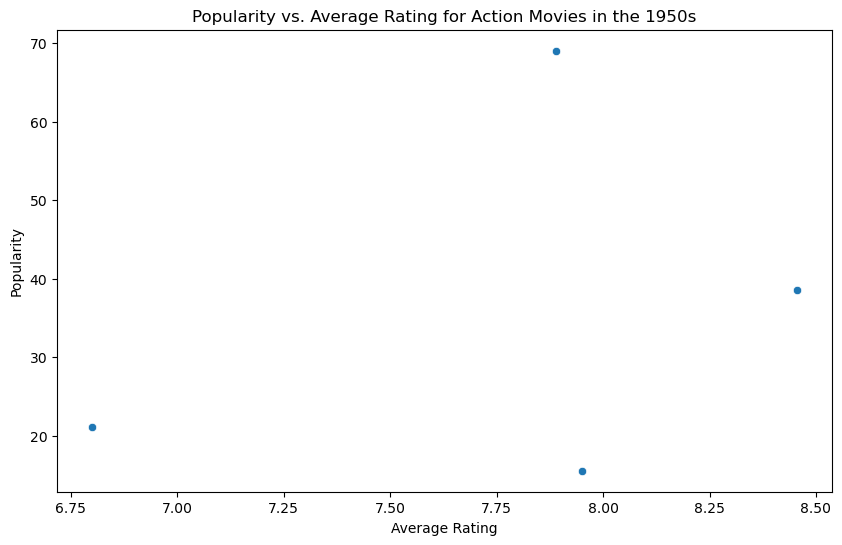

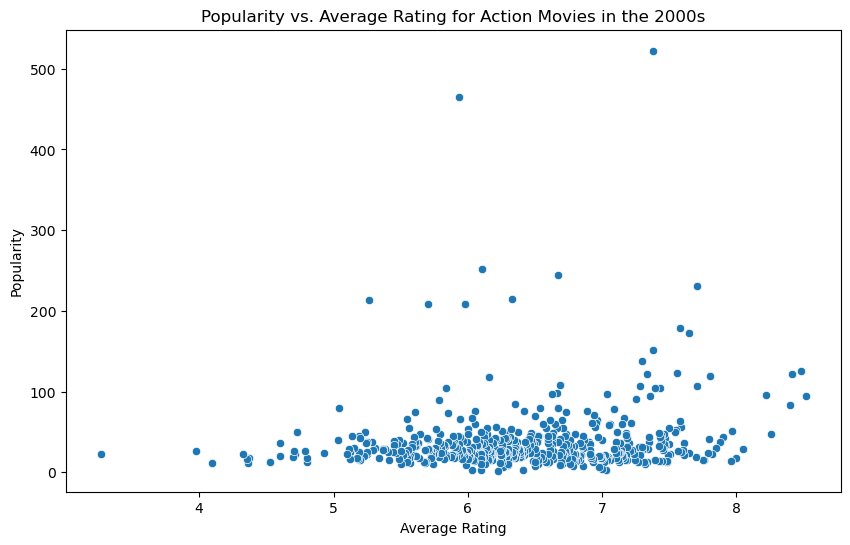

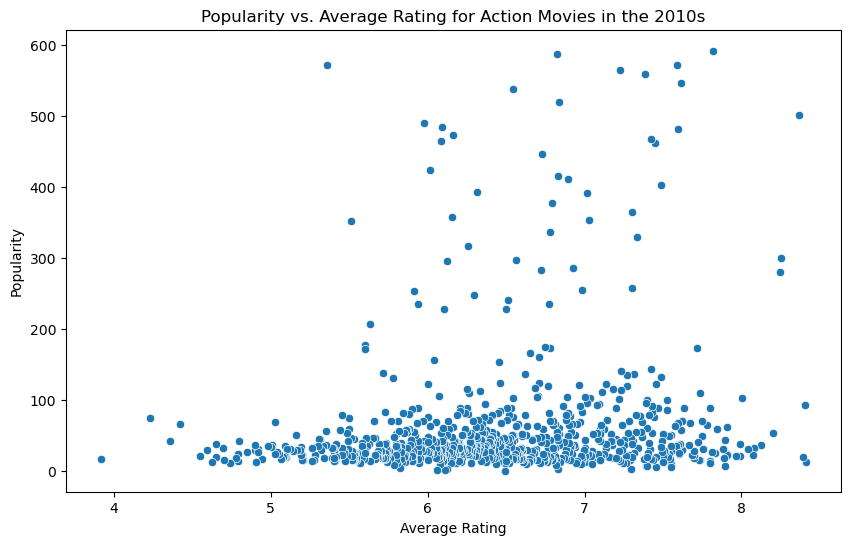

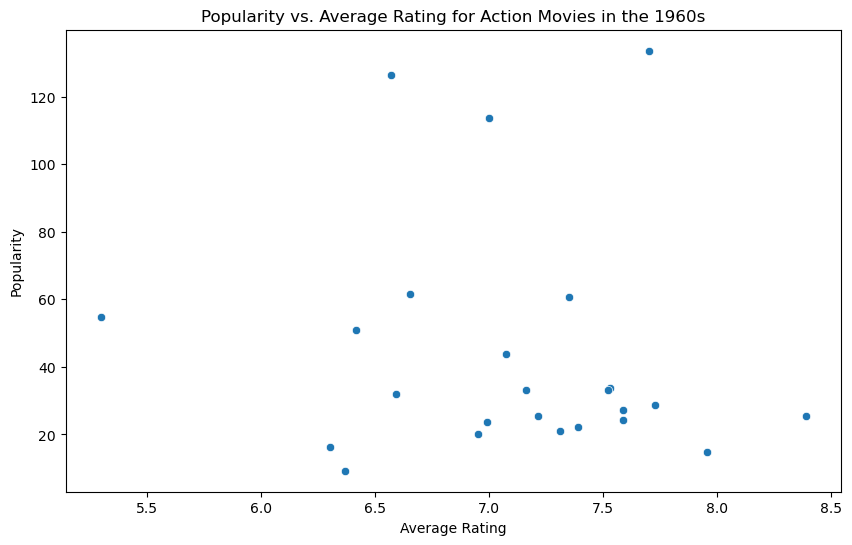

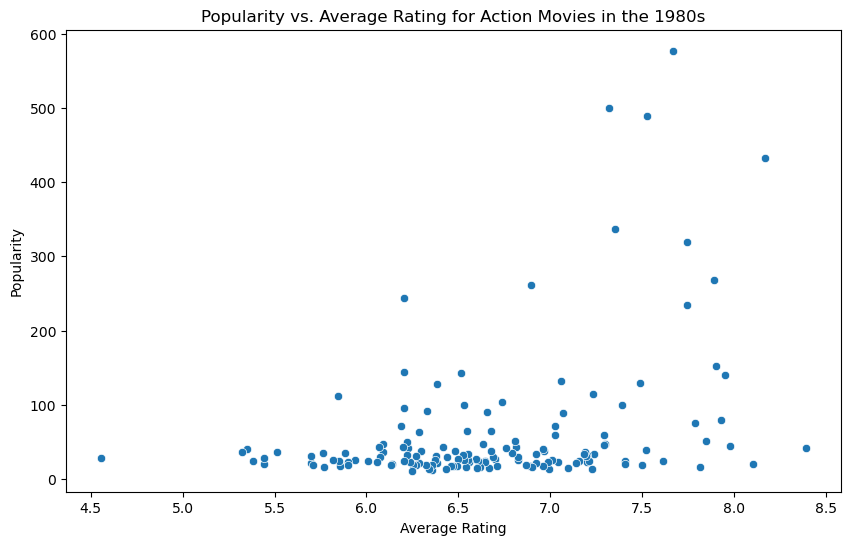

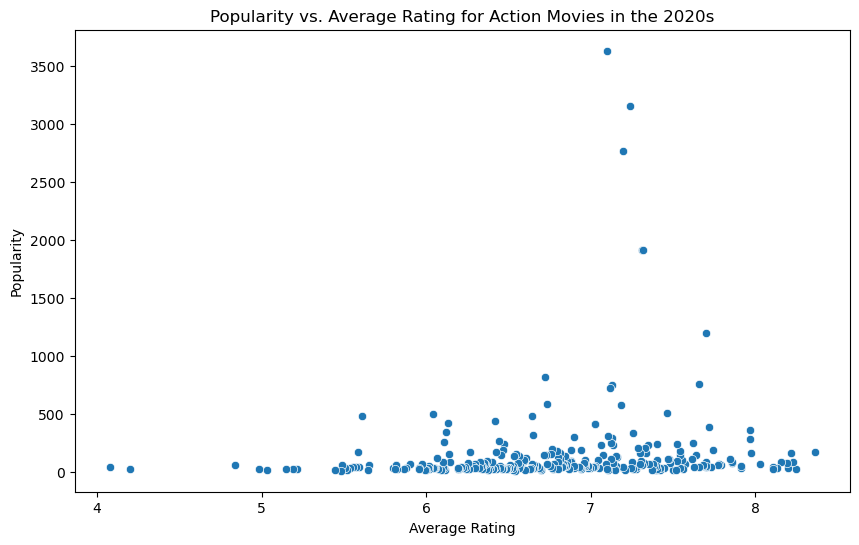

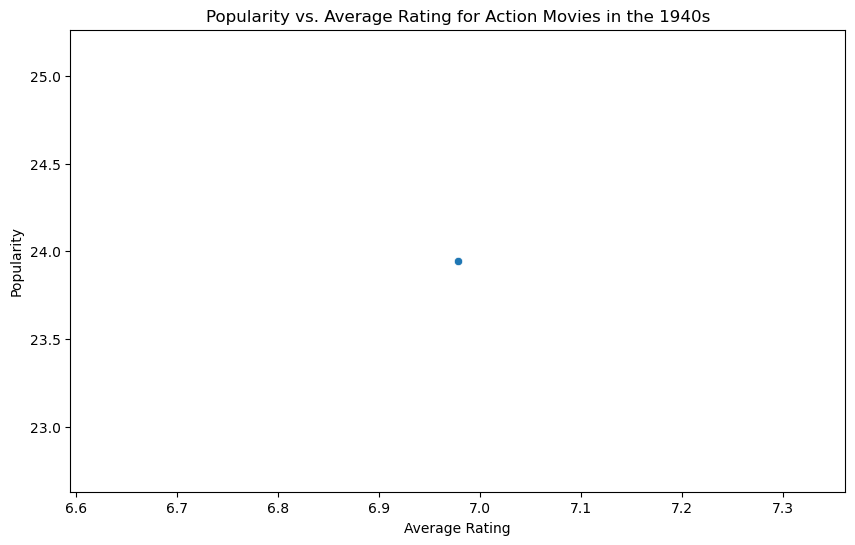

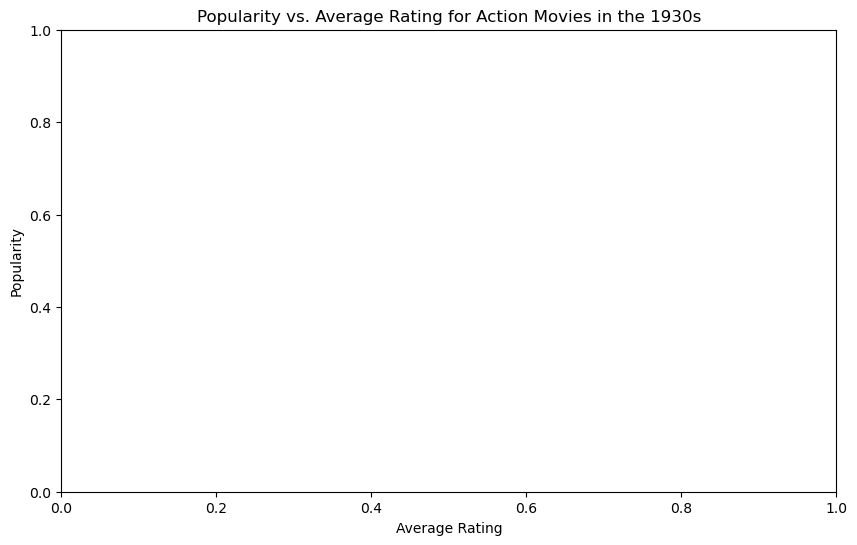

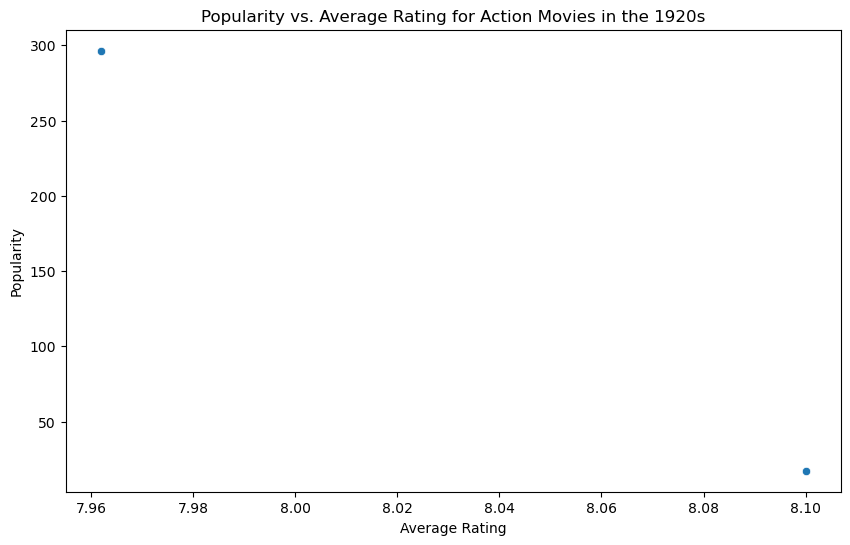

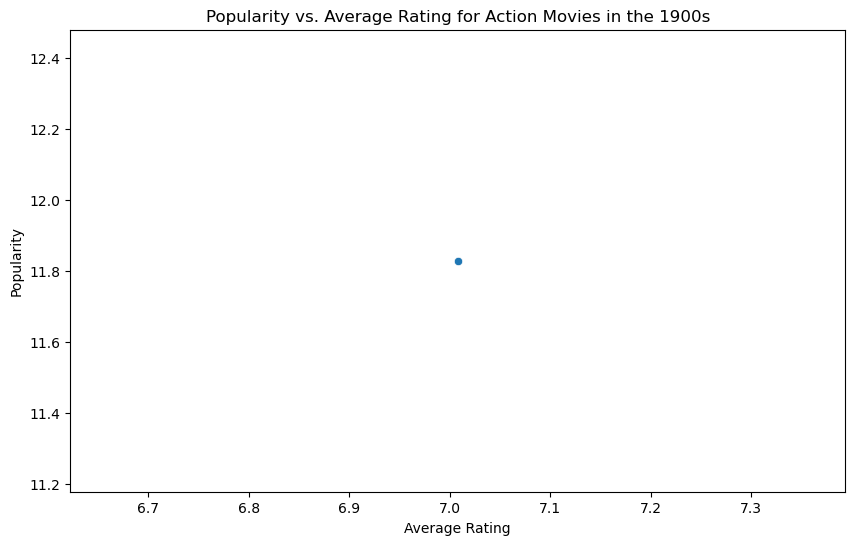

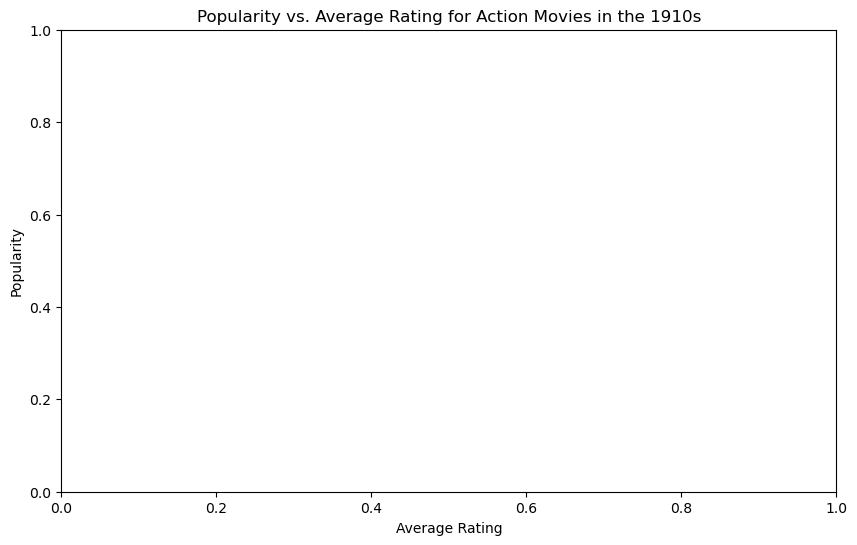

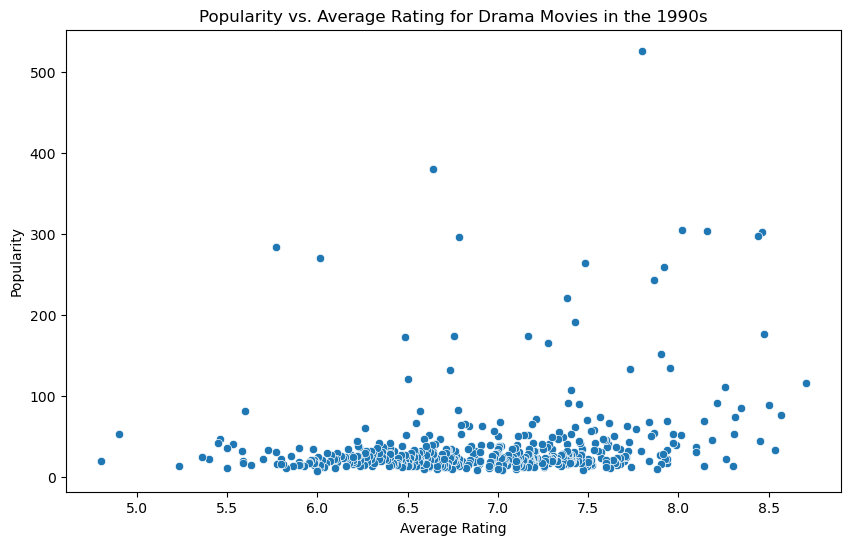

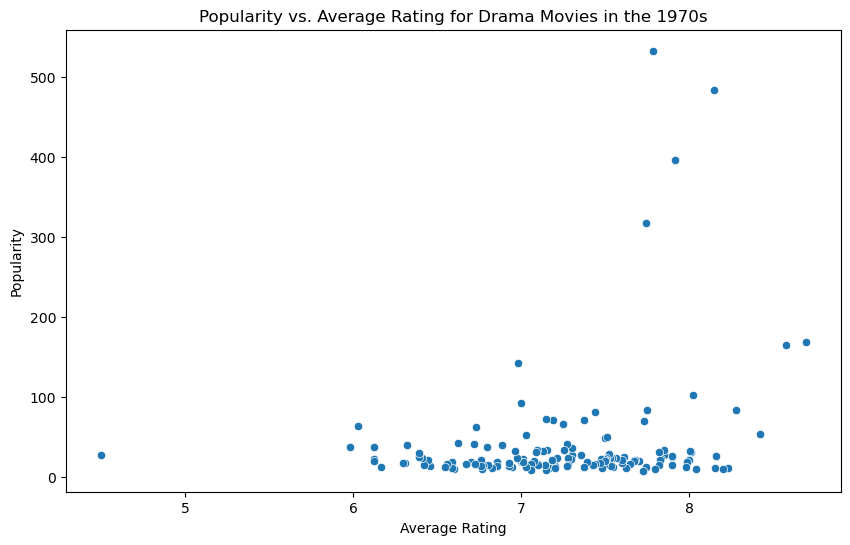

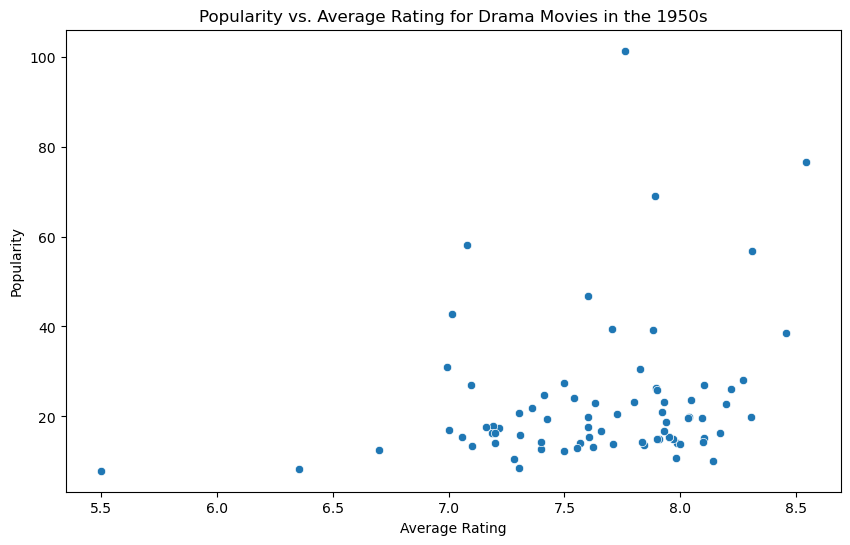

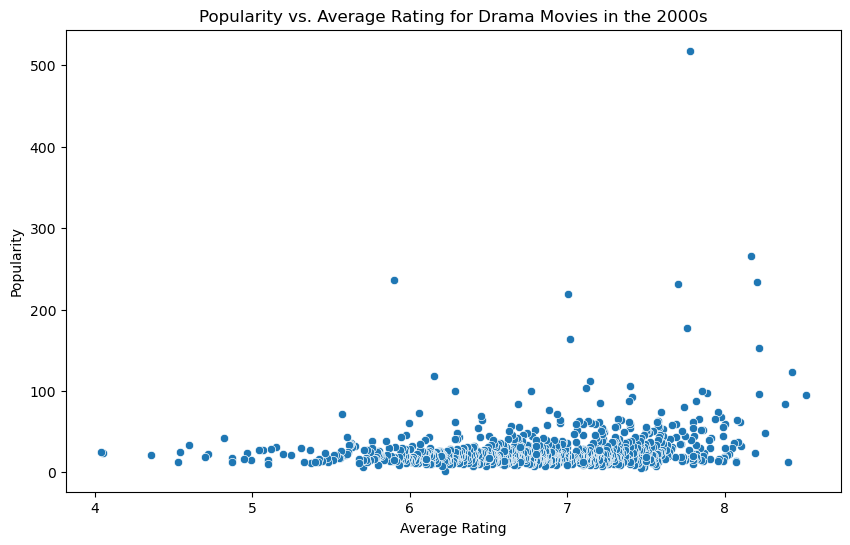

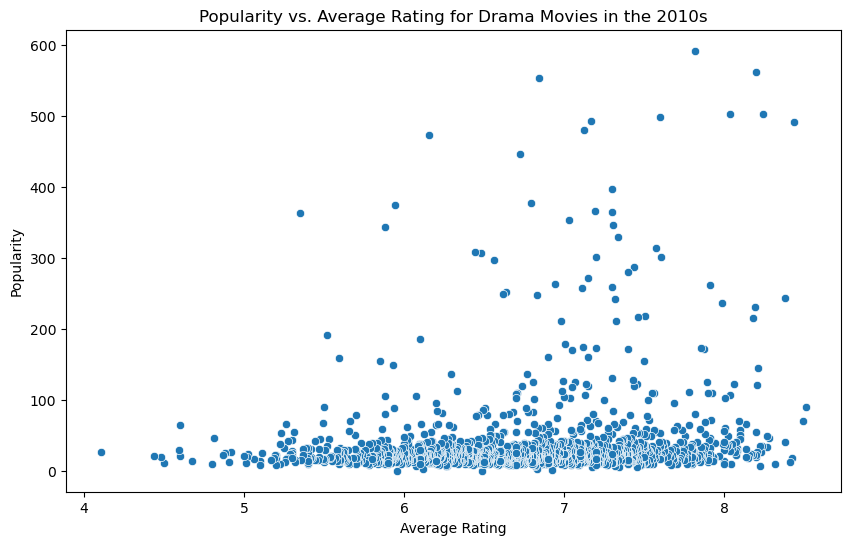

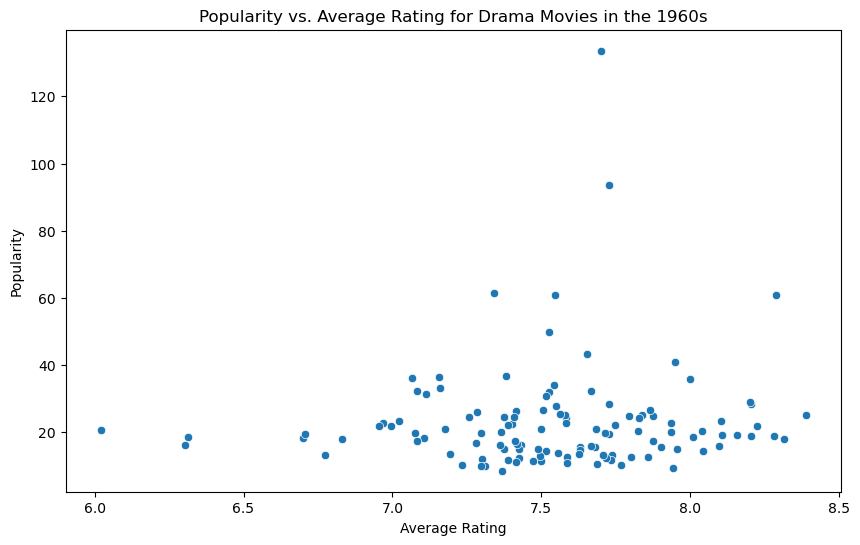

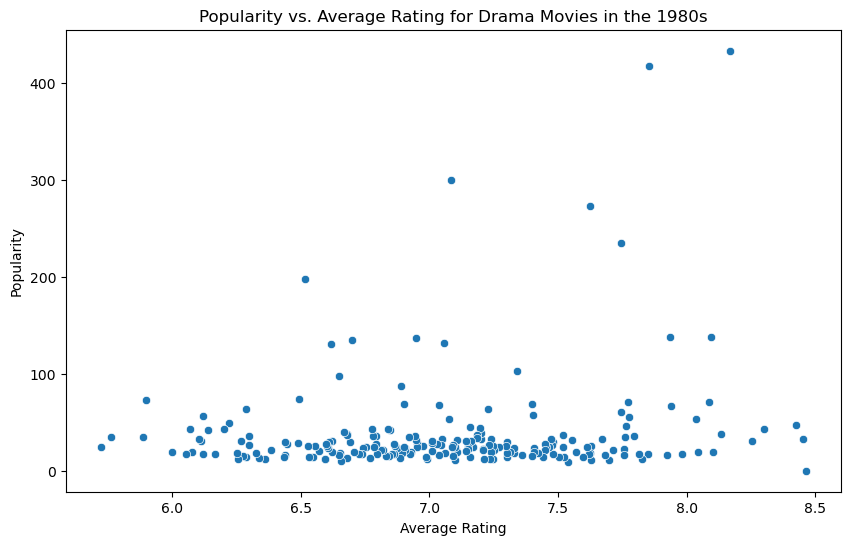

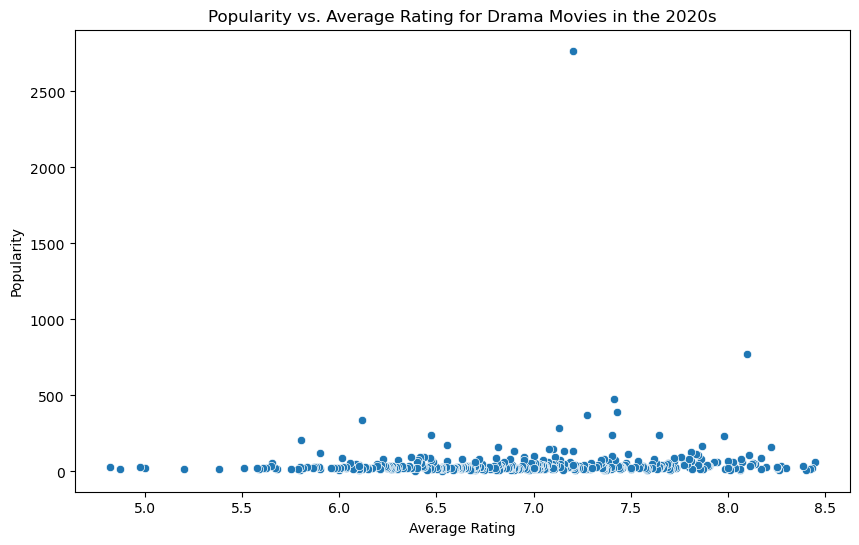

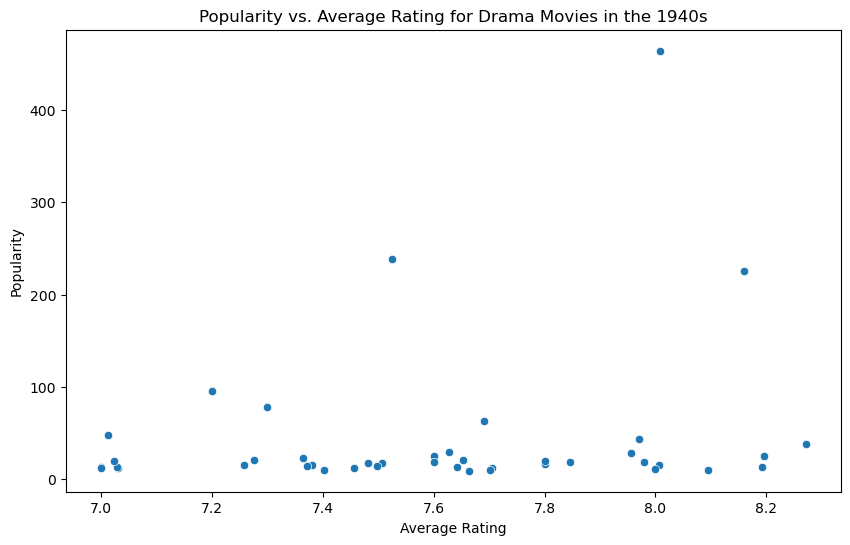

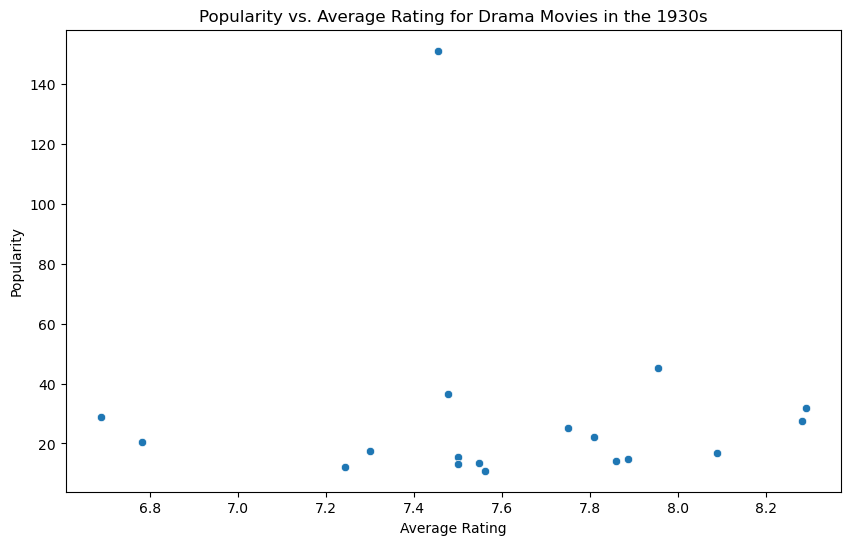

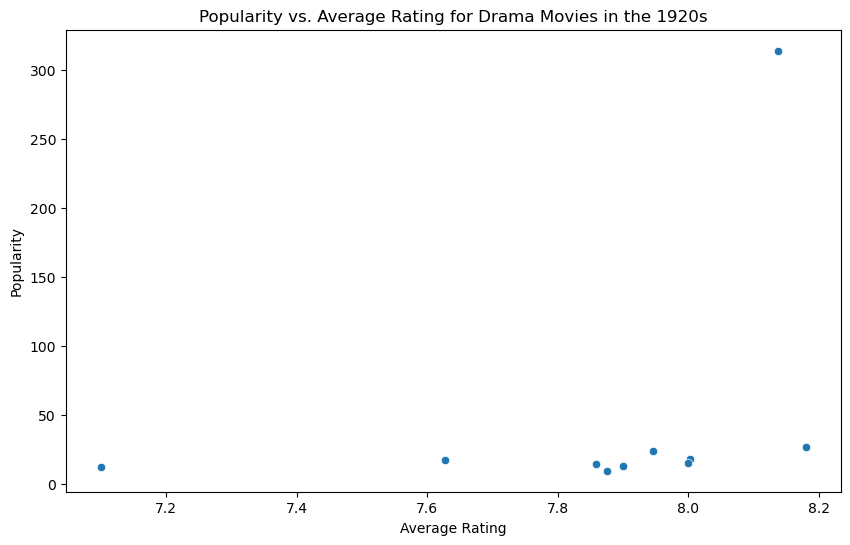

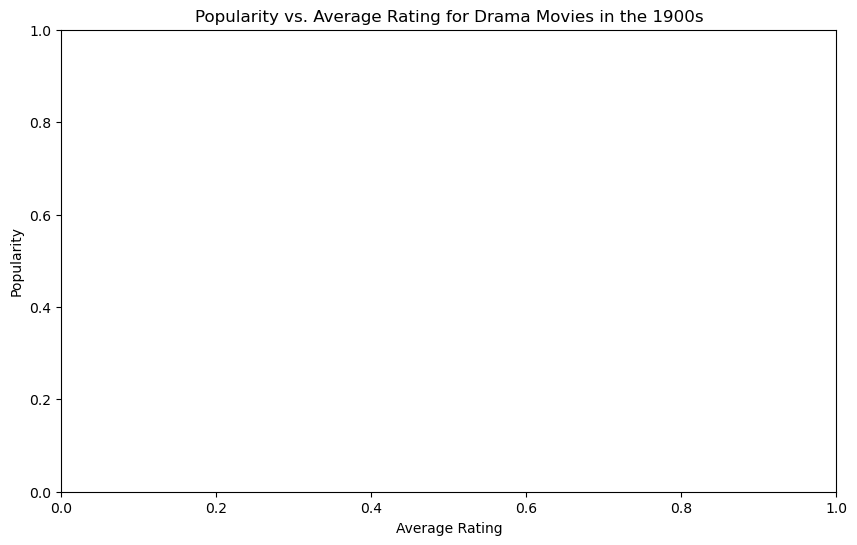

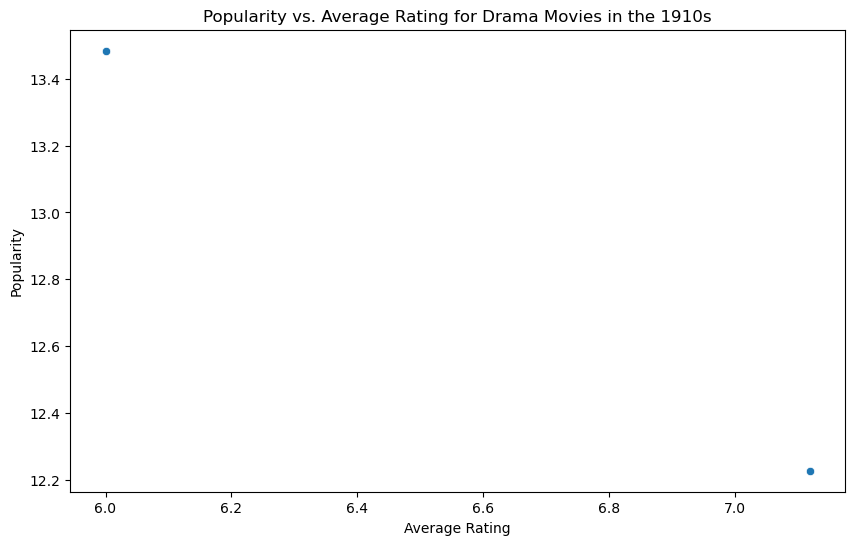

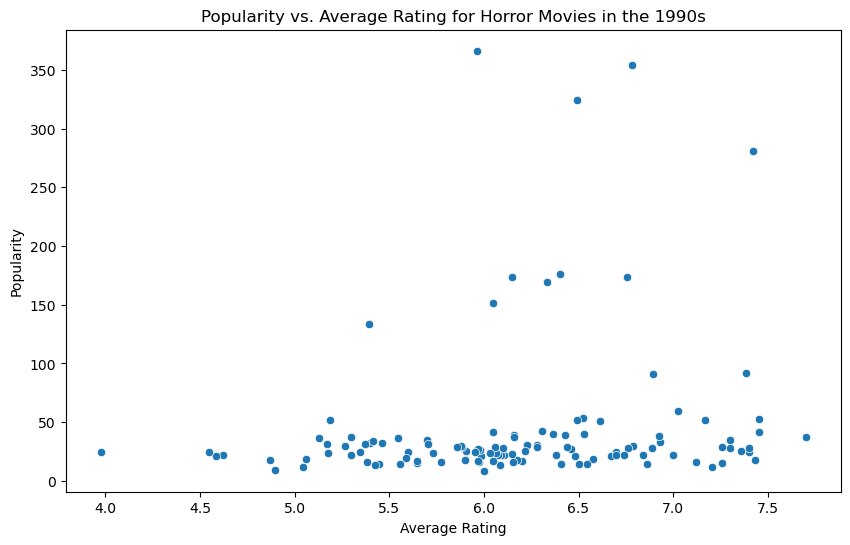

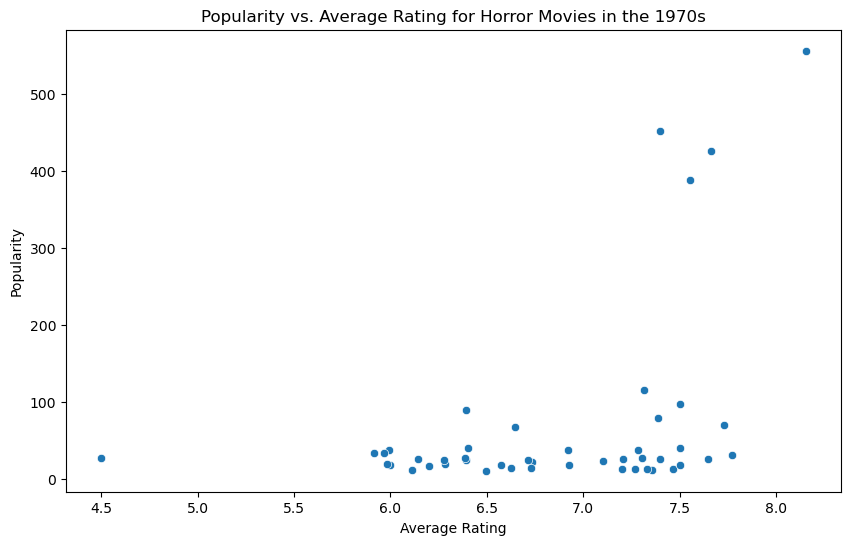

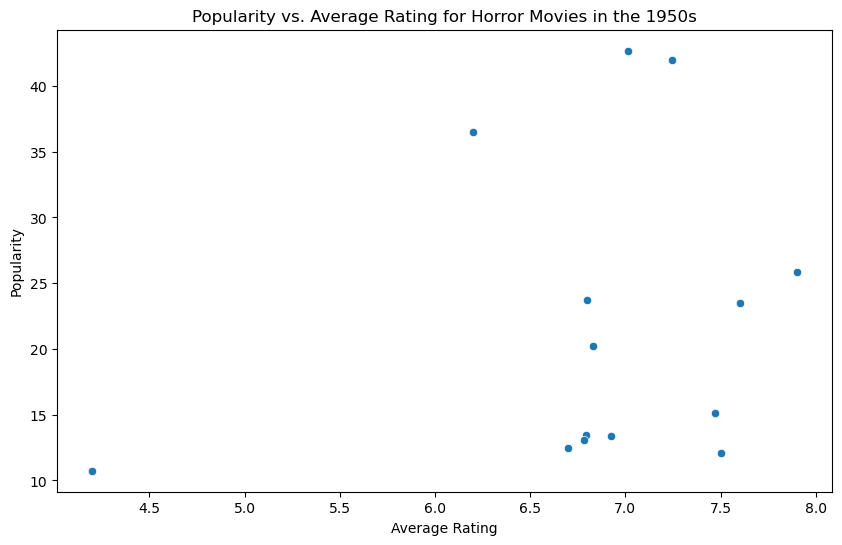

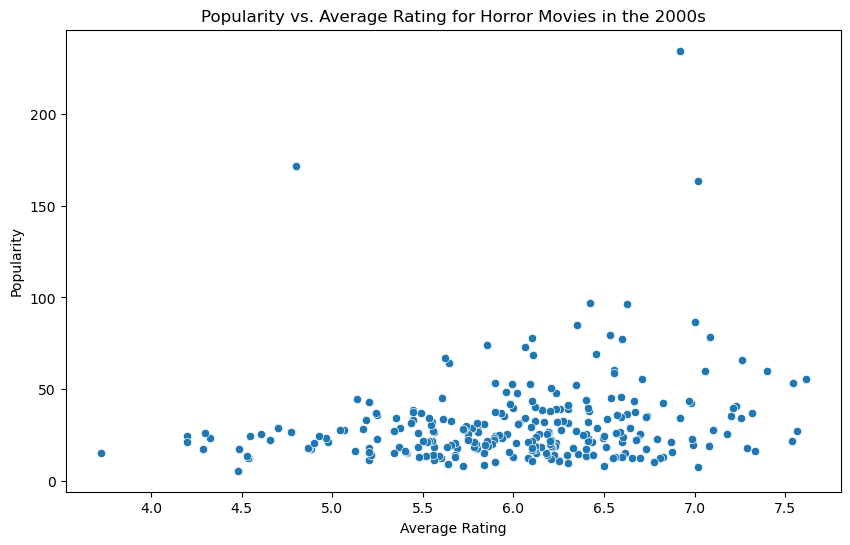

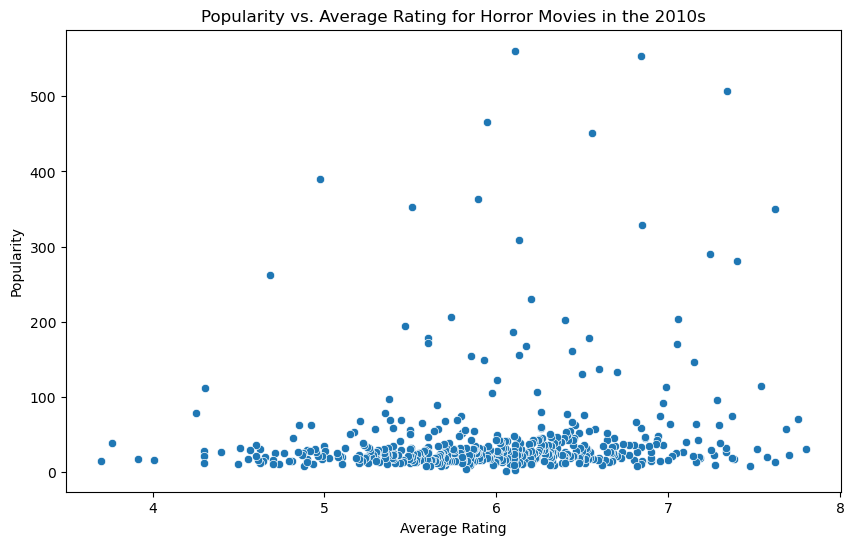

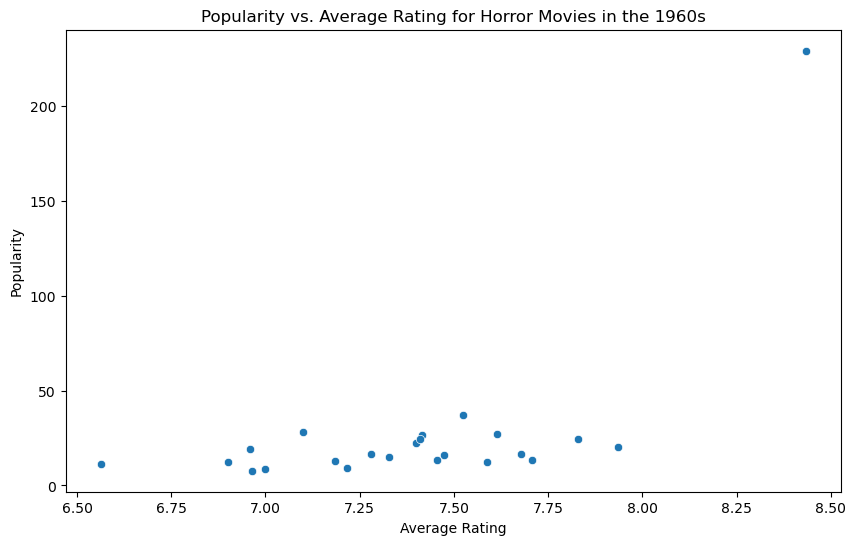

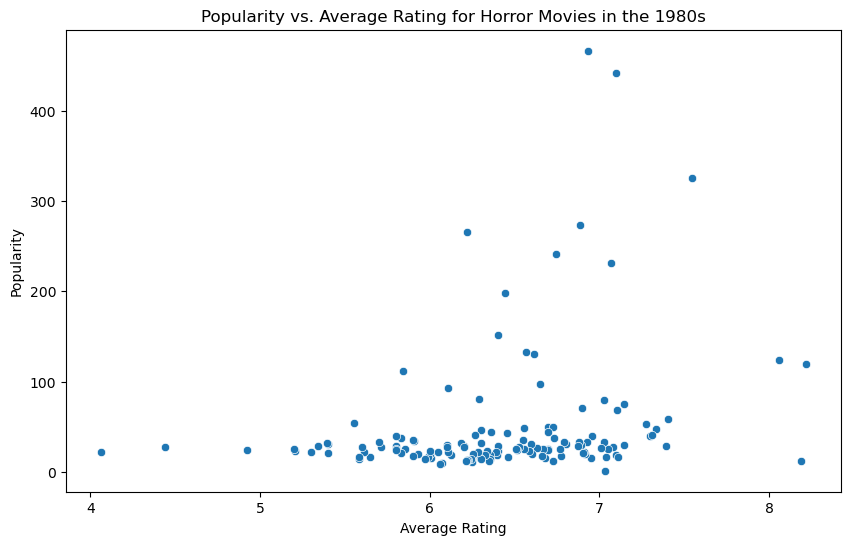

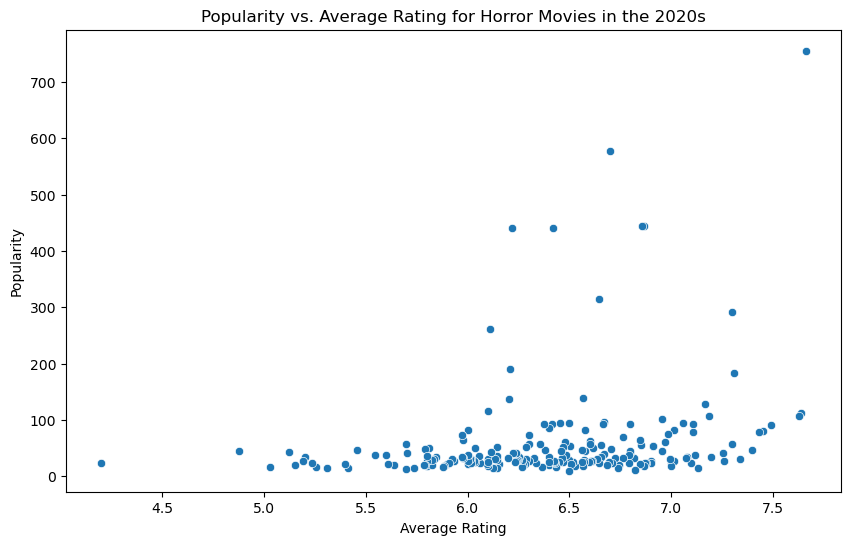

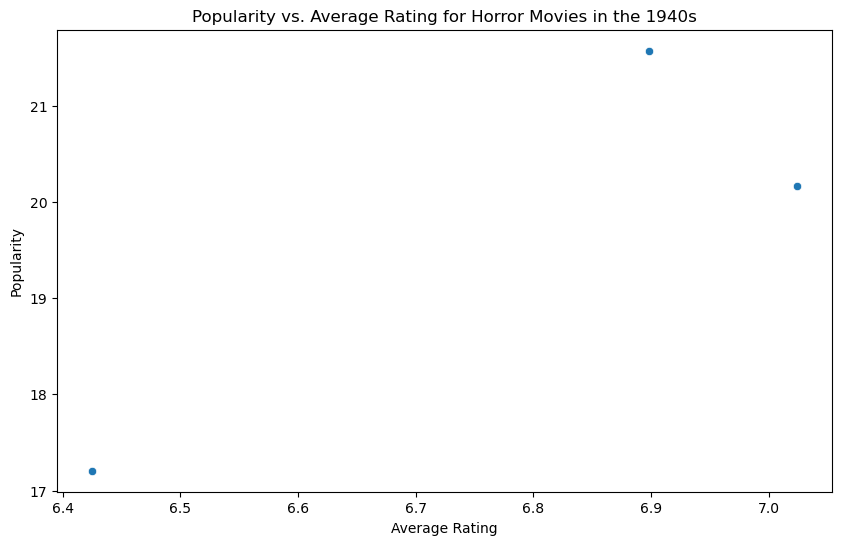

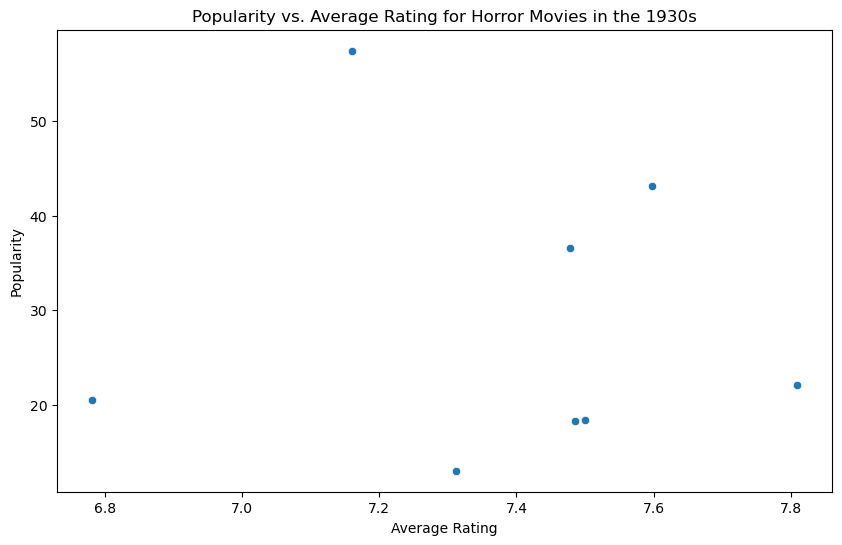

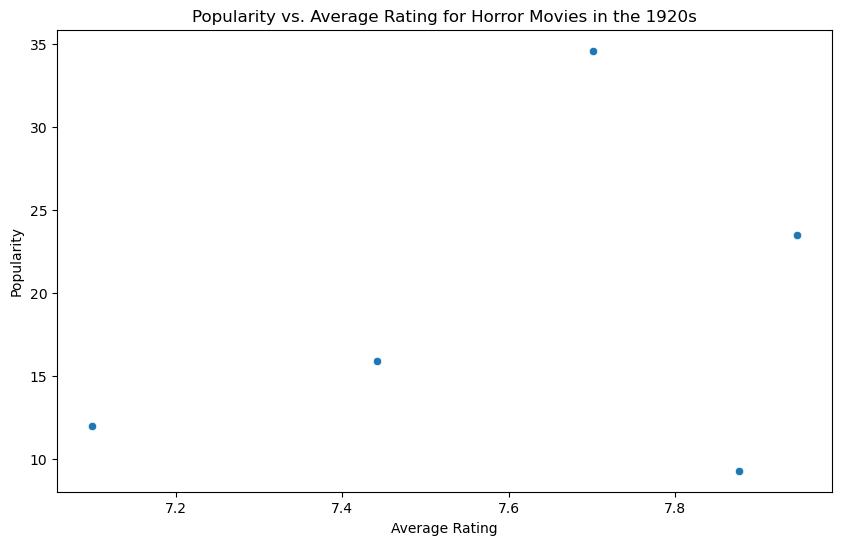

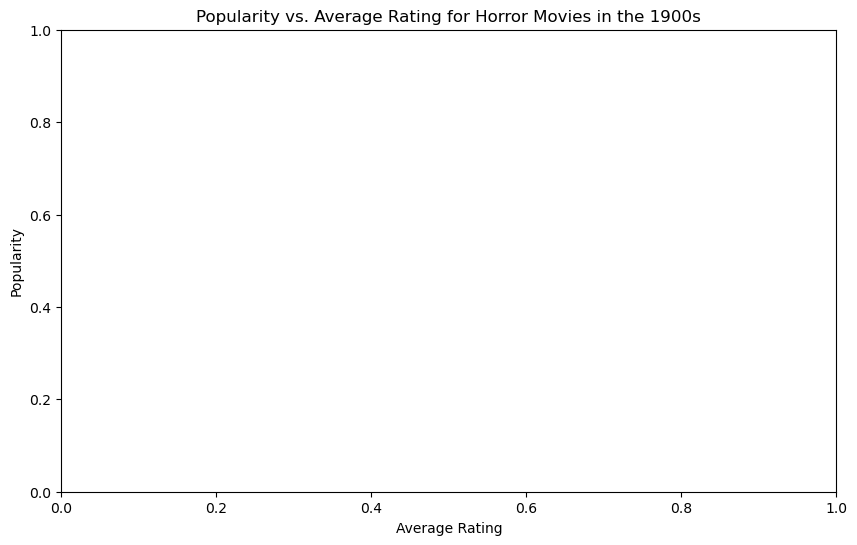

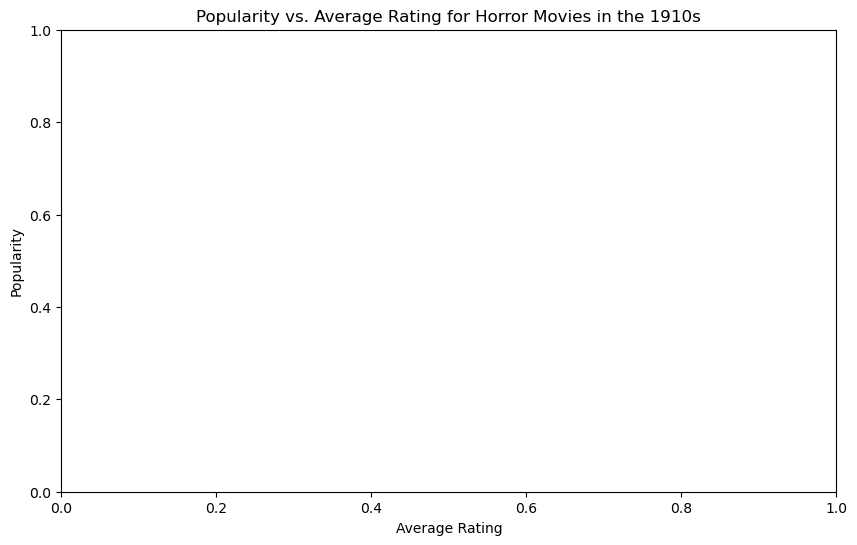

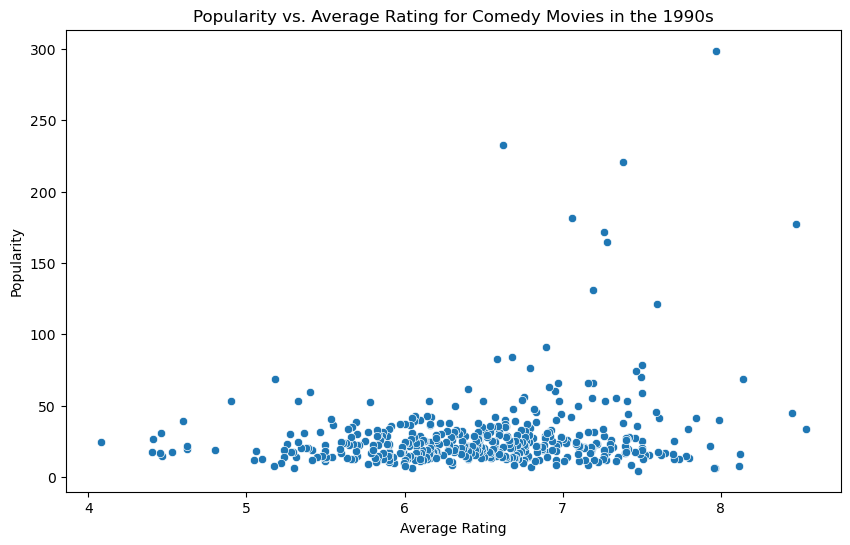

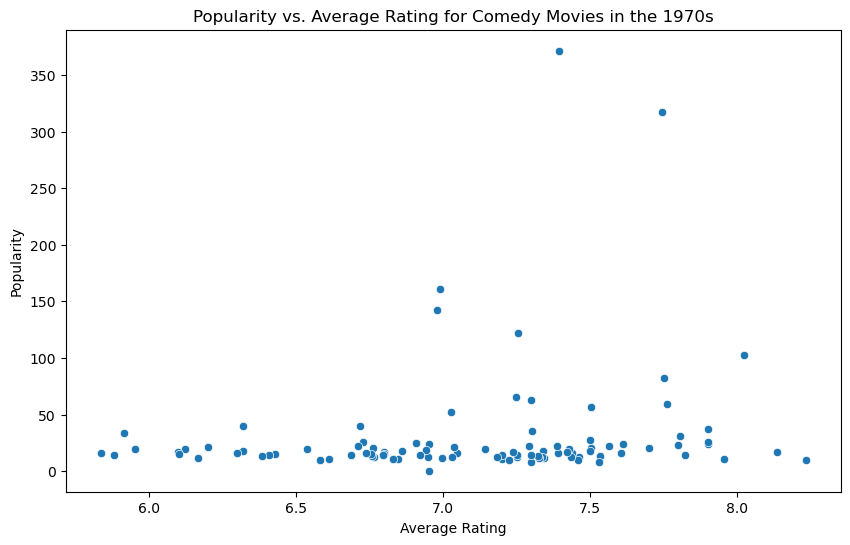

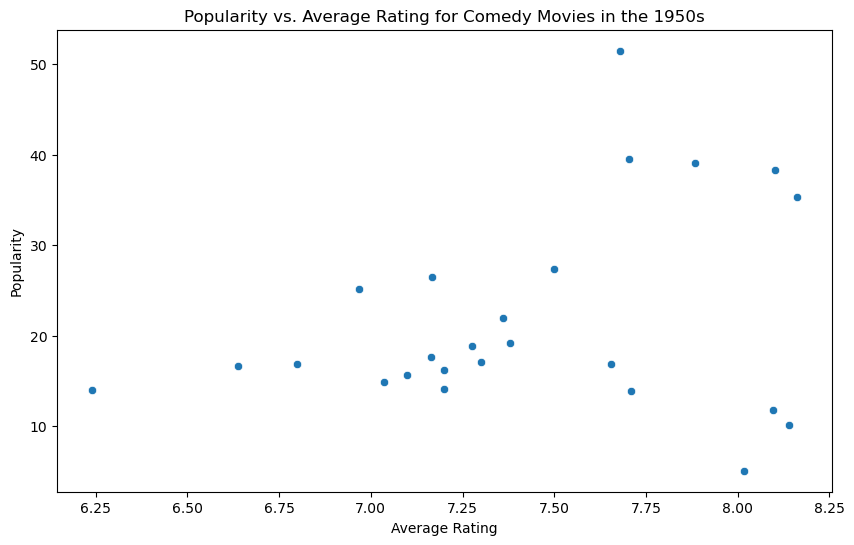

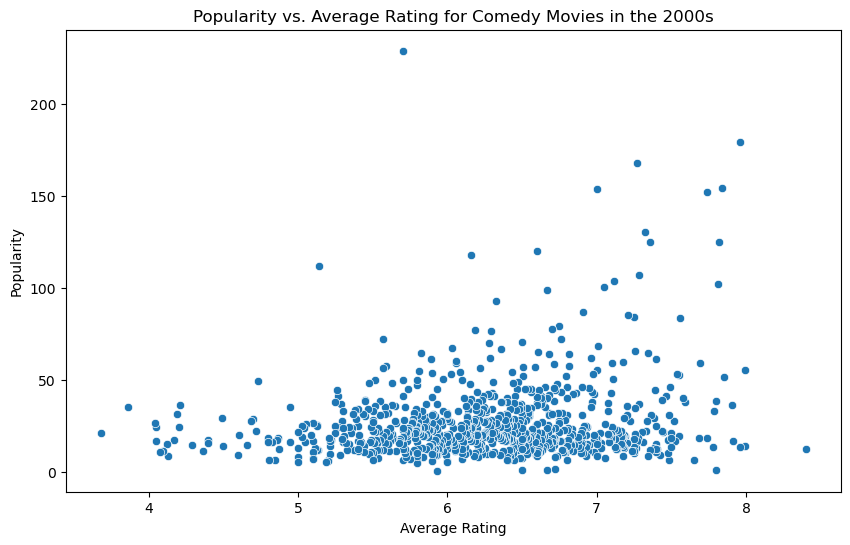

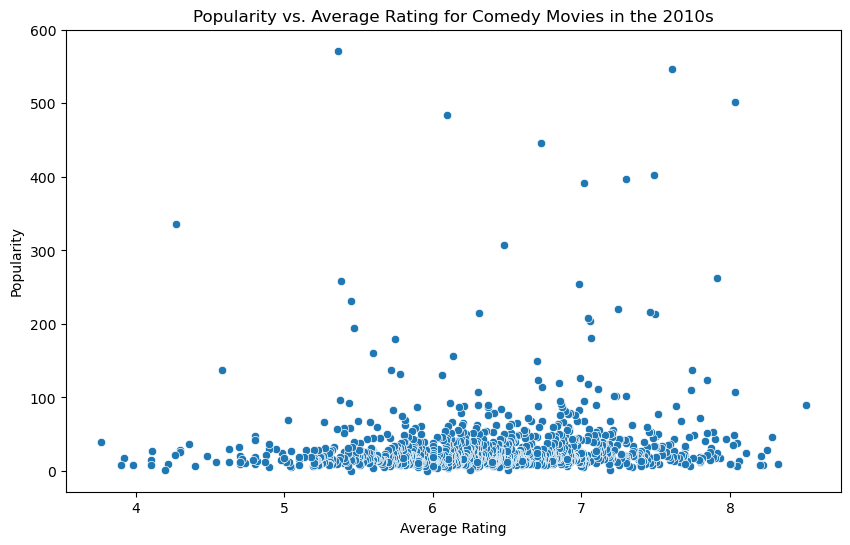

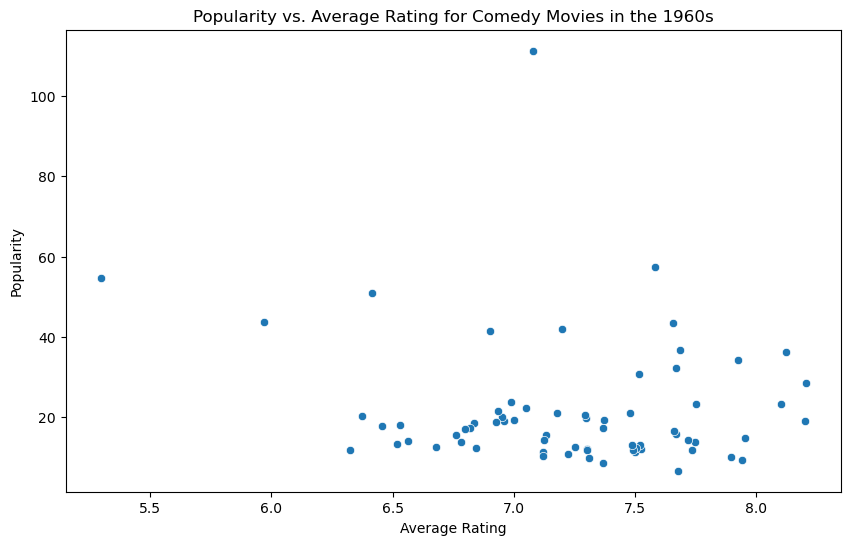

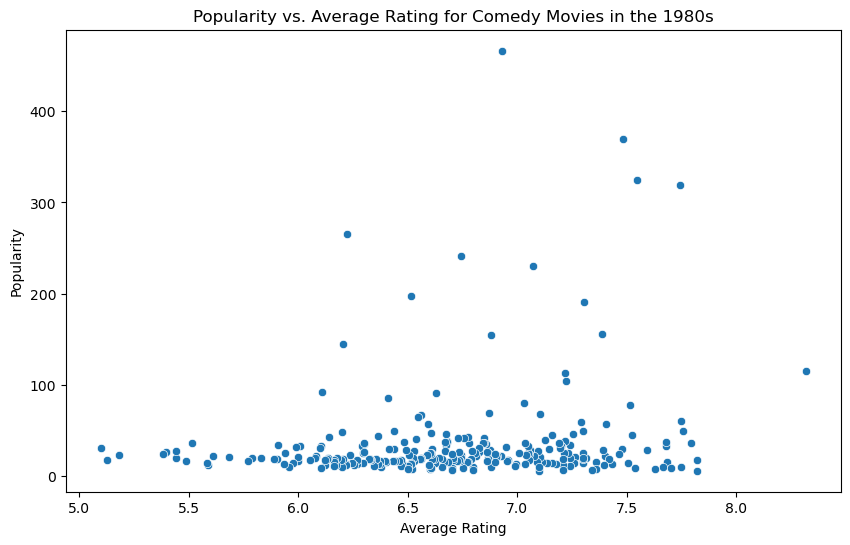

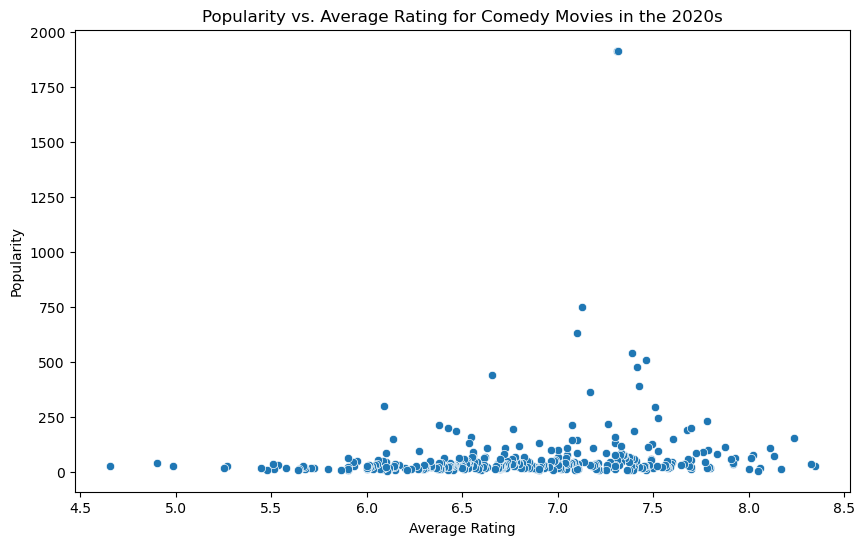

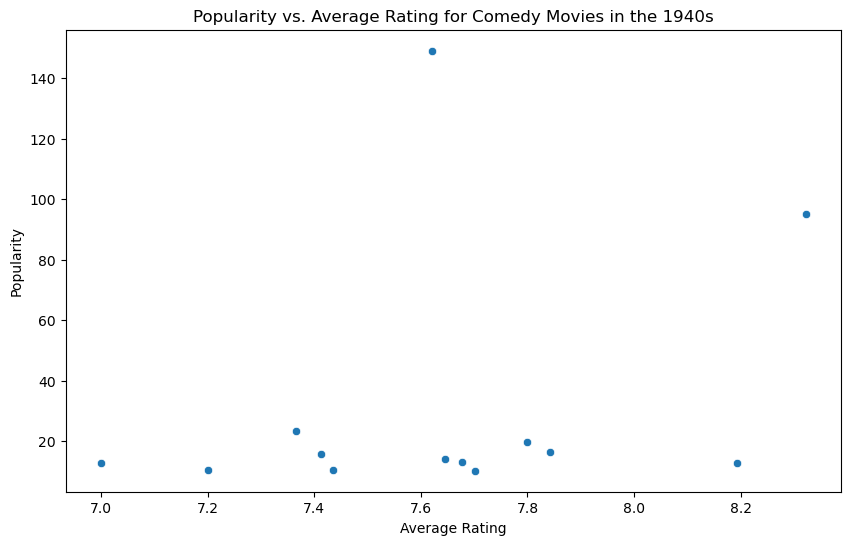

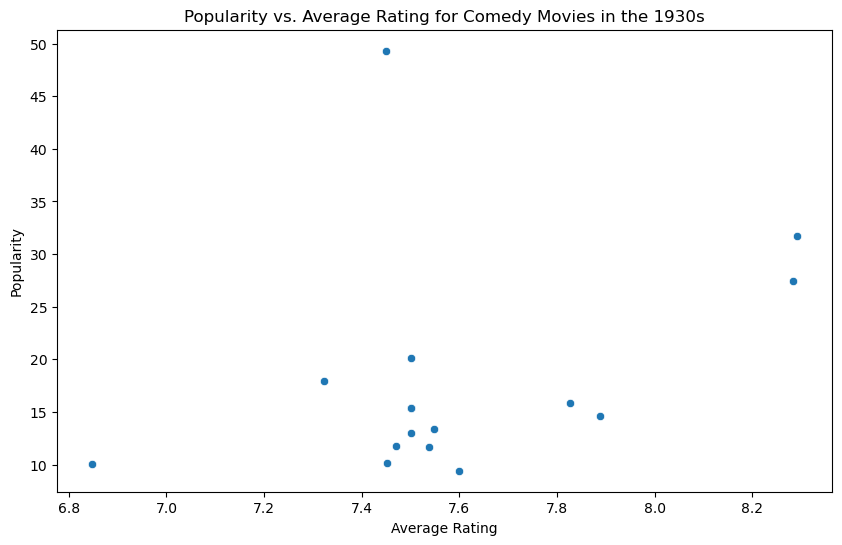

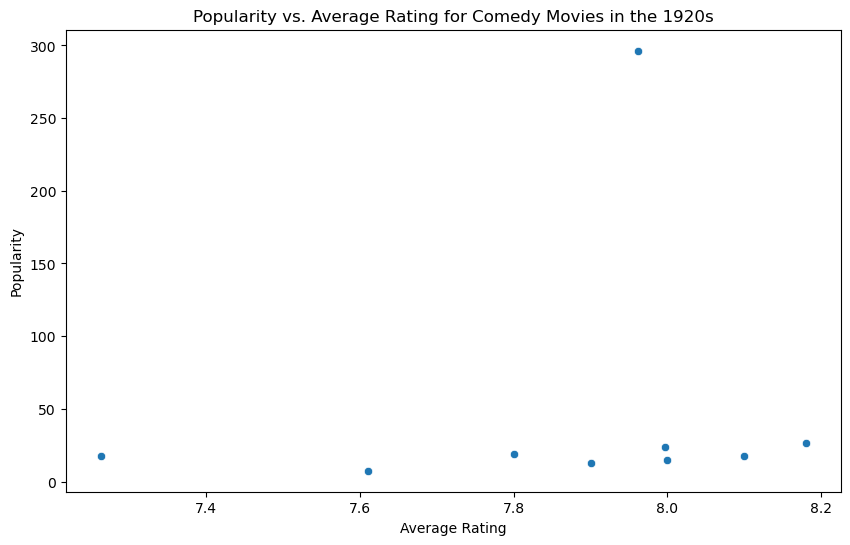

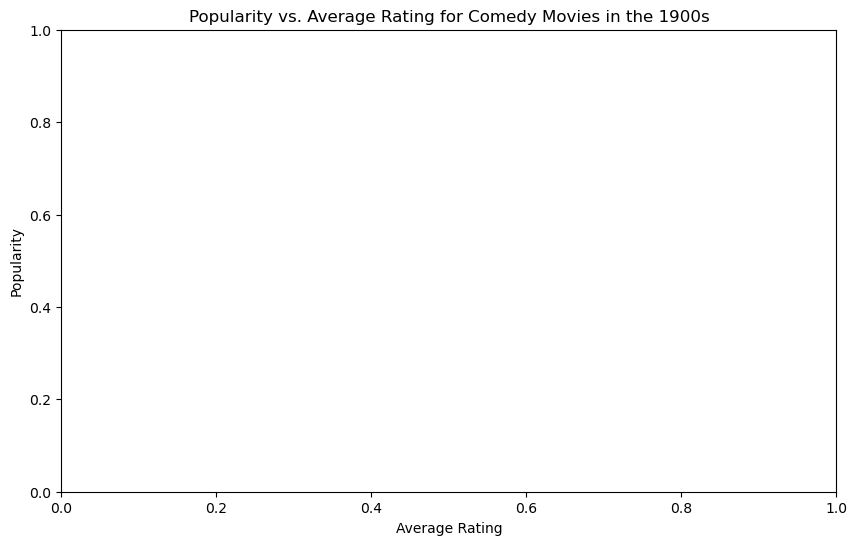

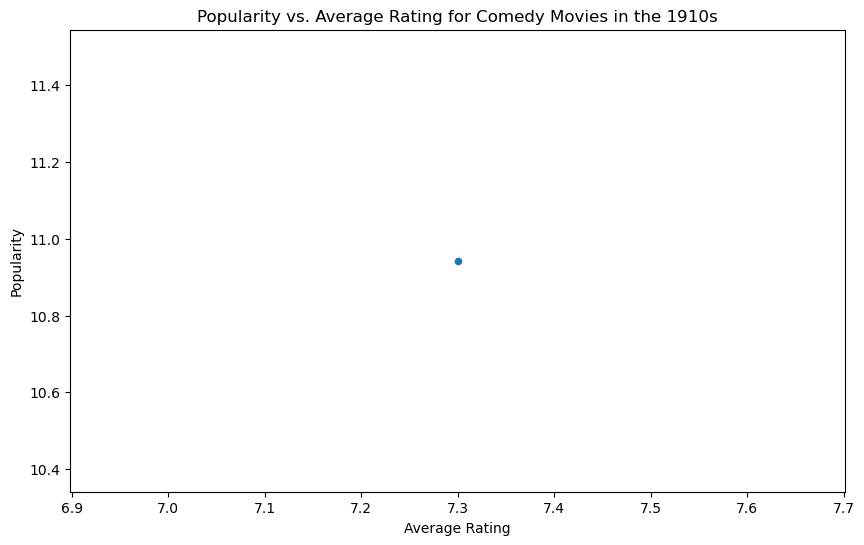

In [26]:
# Plot popularity vs average rating for each genre by decade
for genre in genres:
    for decade in decades:
        decade_movies = movies_df[(movies_df['decade'] == decade) &
                                  (movies_df['genre_names'].str.contains(genre, na=False))]
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='vote_average', y='popularity', data=decade_movies)
        plt.title(f'Popularity vs. Average Rating for {genre} Movies in the {decade}s')
        plt.xlabel('Average Rating')
        plt.ylabel('Popularity')
        plt.show()

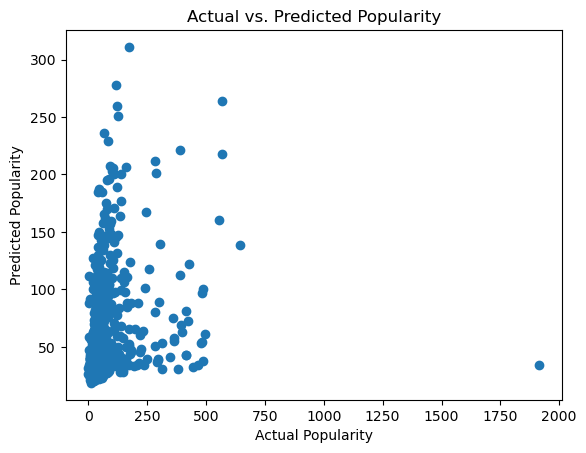

In [27]:
features = ['vote_average', 'vote_count']
X = movies_df[features]
y = movies_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

In [28]:
# Log transformation for skewed numerical features
movies_df['log_popularity'] = np.log1p(movies_df['popularity'])
movies_df['log_vote_count'] = np.log1p(movies_df['vote_count'])

In [29]:
# One-hot encoding for genres
genres_encoded = movies_df['genre_names'].str.get_dummies(sep=',')
movies_df = pd.concat([movies_df, genres_encoded], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


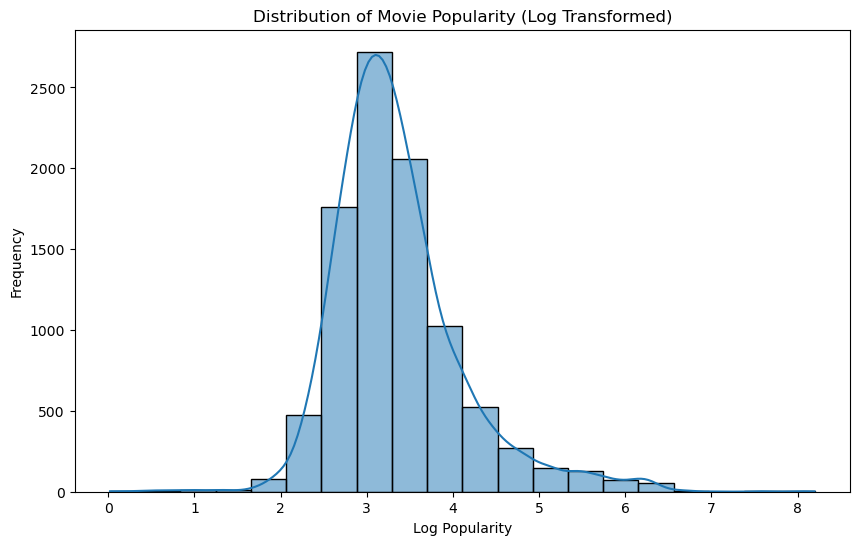

In [30]:
# Distribution of Movie Popularity
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['log_popularity'], bins=20, kde=True)
plt.title('Distribution of Movie Popularity (Log Transformed)')
plt.xlabel('Log Popularity')
plt.ylabel('Frequency')
plt.show()

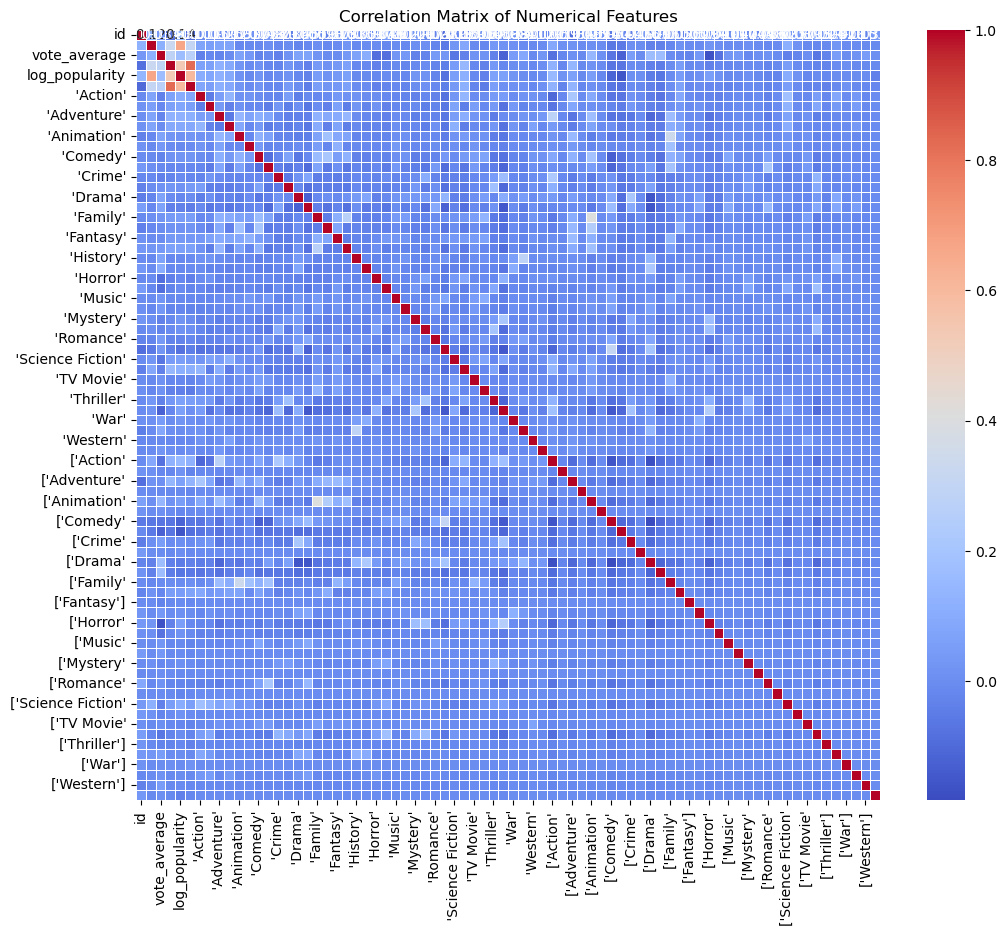

In [31]:
# Correlation Matrix of Numerical Features
numerical_cols = movies_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


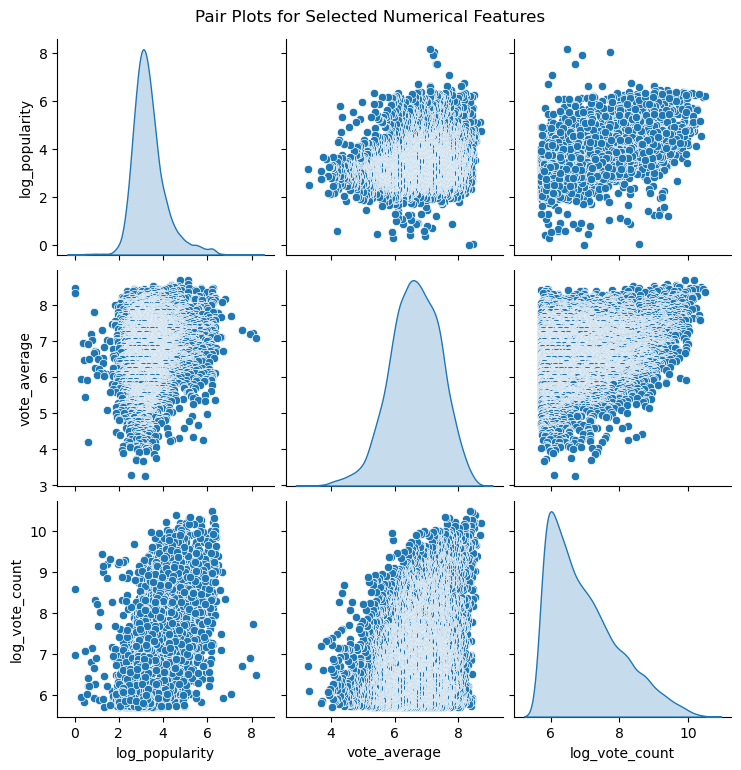

In [32]:
# Pair Plots for Selected Numerical Features
sns.pairplot(movies_df, vars=['log_popularity', 'vote_average', 'log_vote_count'], diag_kind='kde')
plt.suptitle('Pair Plots for Selected Numerical Features', y=1.02)
plt.show()

In [33]:
# Detecting and analyzing outliers
popularity_threshold = movies_df['log_popularity'].quantile(0.99)
vote_count_threshold = movies_df['log_vote_count'].quantile(0.99)
outliers = movies_df[(movies_df['log_popularity'] > popularity_threshold) | 
                     (movies_df['log_vote_count'] > vote_count_threshold)]
print(outliers[['original_title', 'popularity', 'vote_count', 'vote_average']])

                original_title  popularity  vote_count  vote_average
0     The Shawshank Redemption     116.038       26221         8.705
1                The Godfather     167.834       19877         8.695
7              The Dark Knight      95.154       31978         8.515
8                          기생충      89.722       17573         8.509
9               The Green Mile      88.370       16851         8.500
...                        ...         ...         ...           ...
7733                       xXx     465.010        4068         5.933
7789             Suicide Squad     253.650       20668         5.913
8153               Judge Dredd     486.121        2340         5.786
8503                Madame Web     482.394        1359         5.611
8895              Ghostbusters     571.572        6236         5.358

[171 rows x 4 columns]


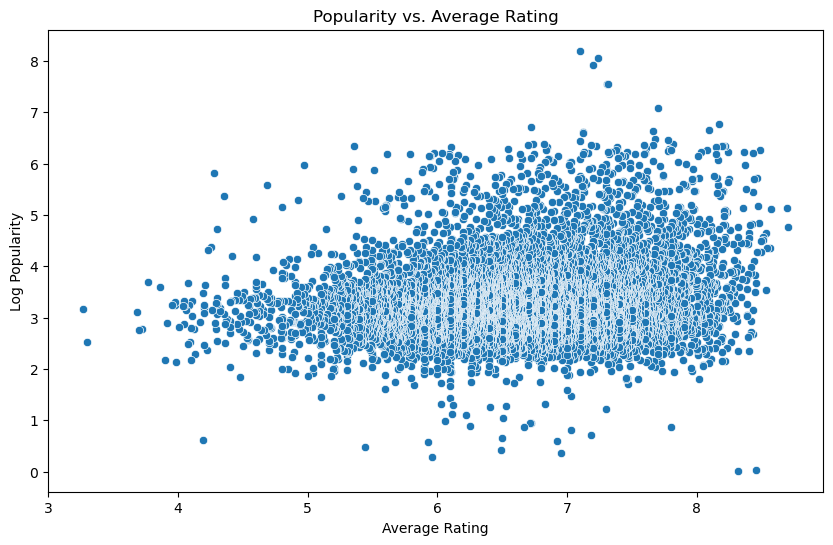

In [34]:
# Popularity vs. Rating Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='log_popularity', data=movies_df)
plt.title('Popularity vs. Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Log Popularity')
plt.show()

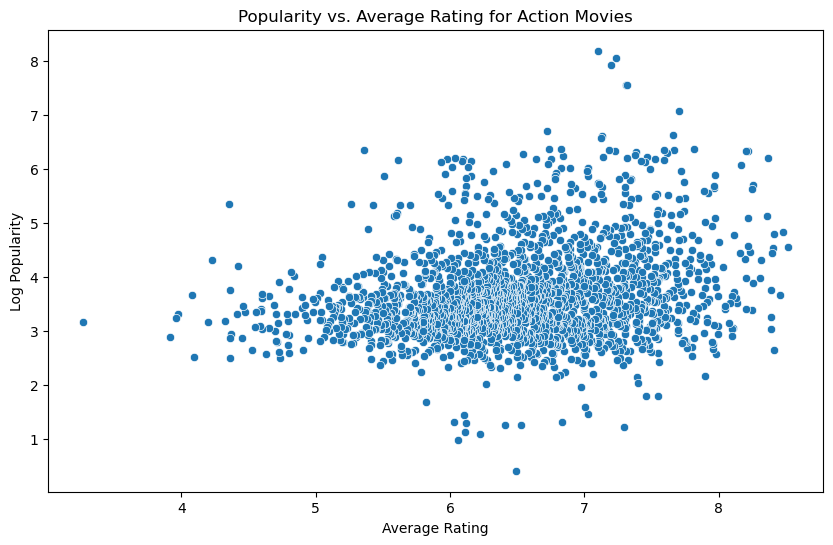

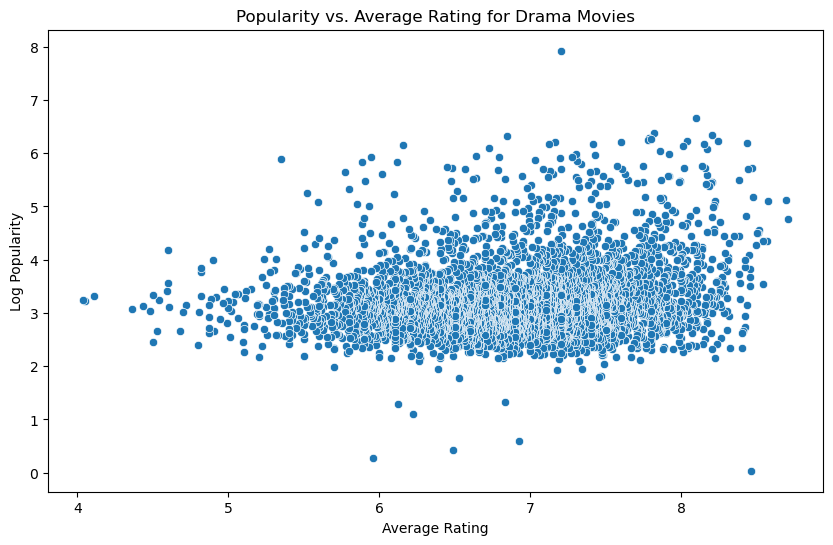

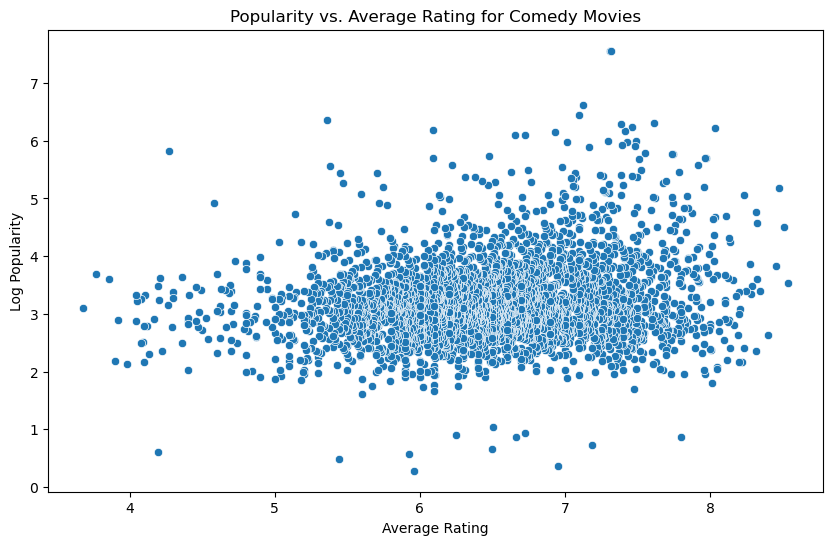

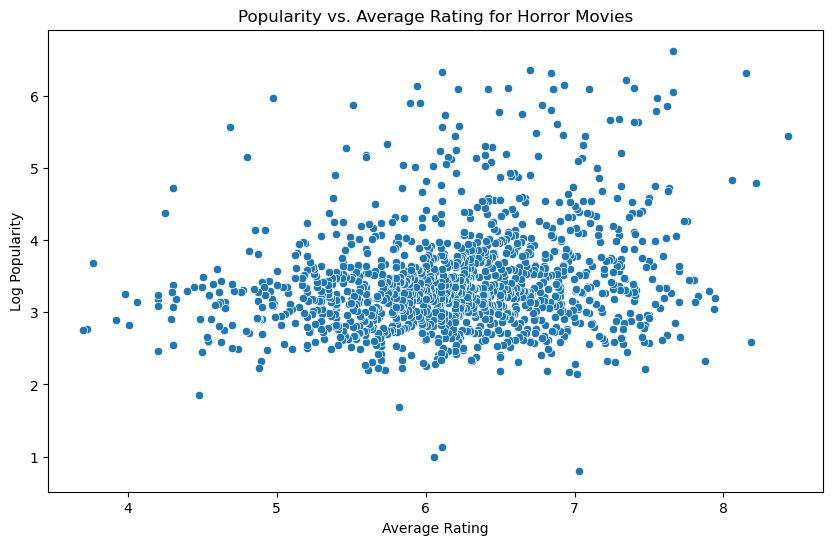

In [35]:
# Popularity vs. Average Rating for Each Genre
genres = ['Action', 'Drama', 'Comedy', 'Horror']
for genre in genres:
    genre_movies = movies_df[movies_df['genre_names'].str.contains(genre, na=False)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='vote_average', y='log_popularity', data=genre_movies)
    plt.title(f'Popularity vs. Average Rating for {genre} Movies')
    plt.xlabel('Average Rating')
    plt.ylabel('Log Popularity')
    plt.show()

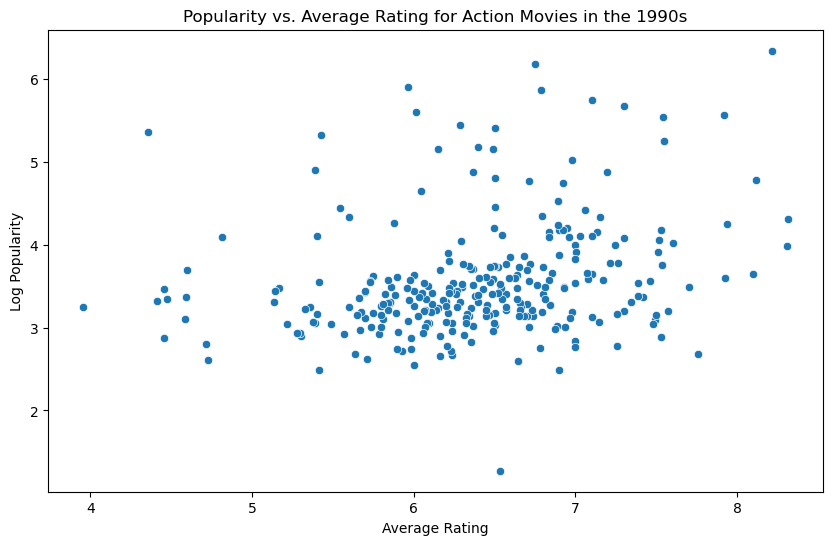

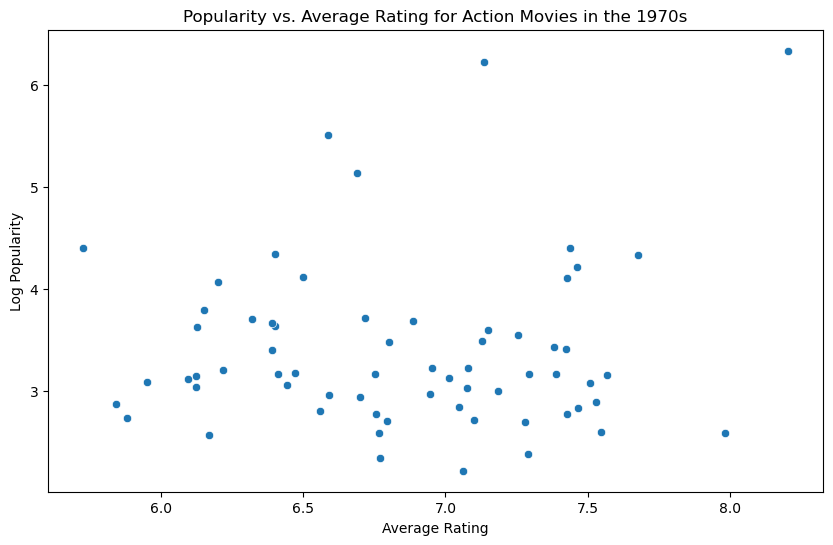

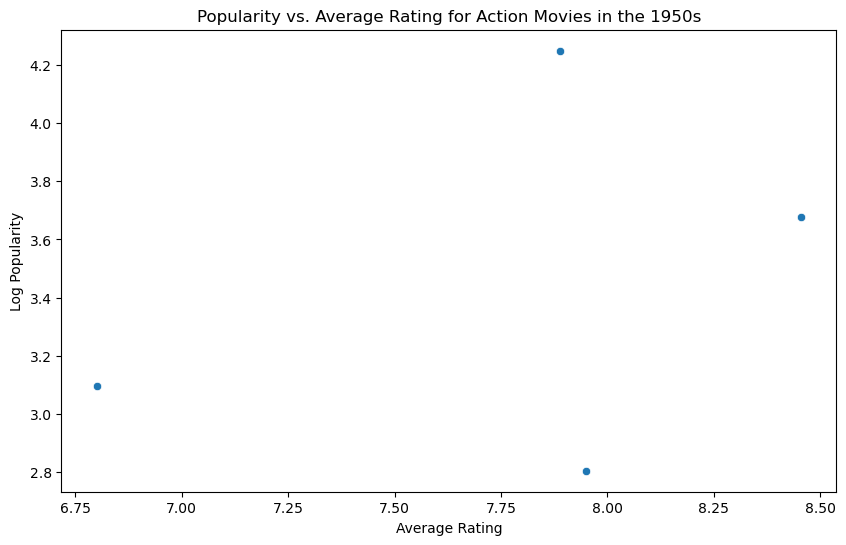

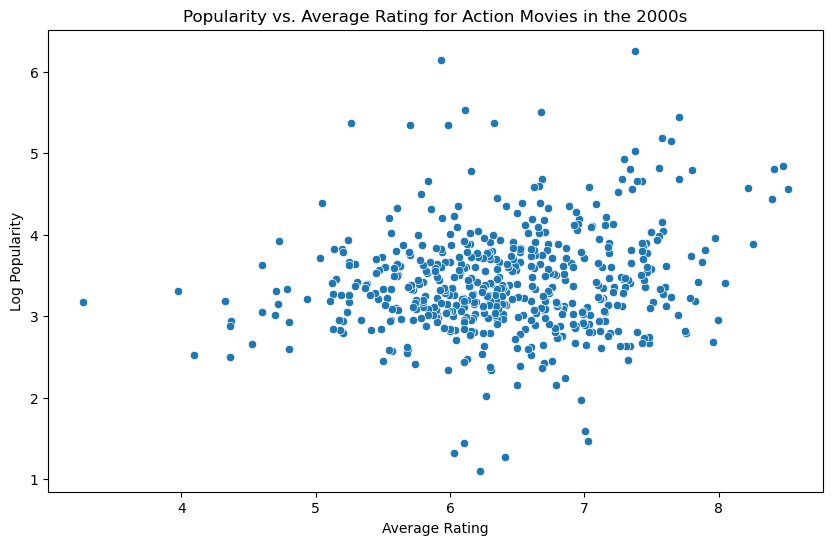

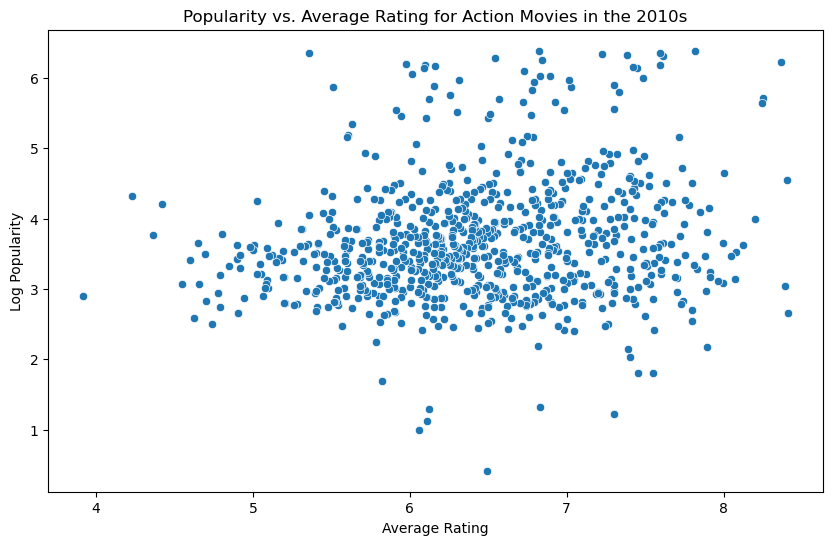

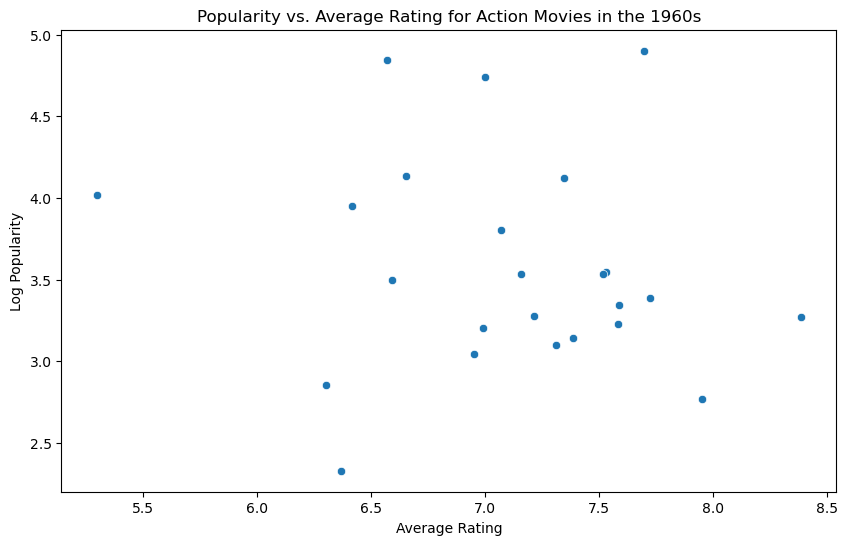

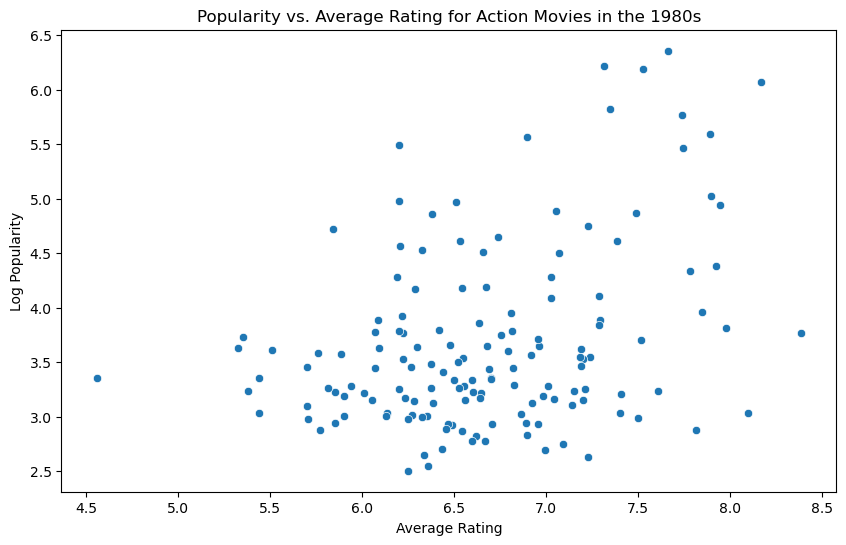

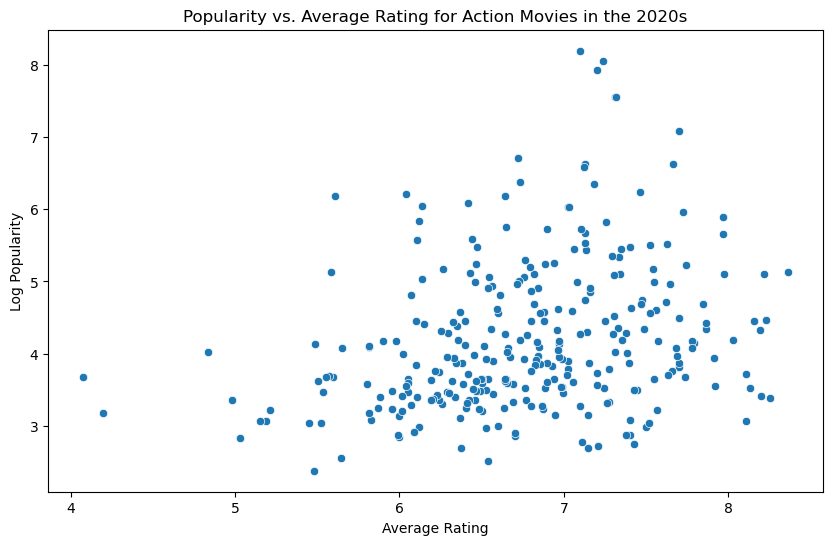

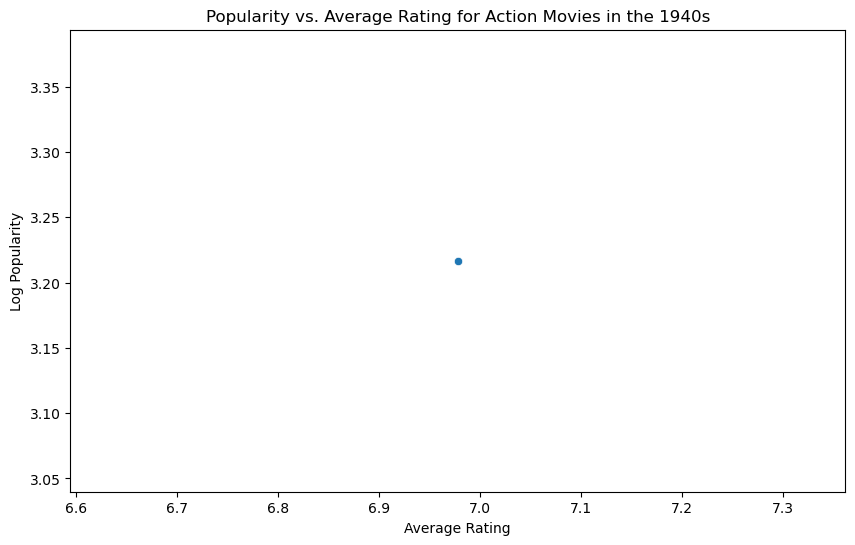

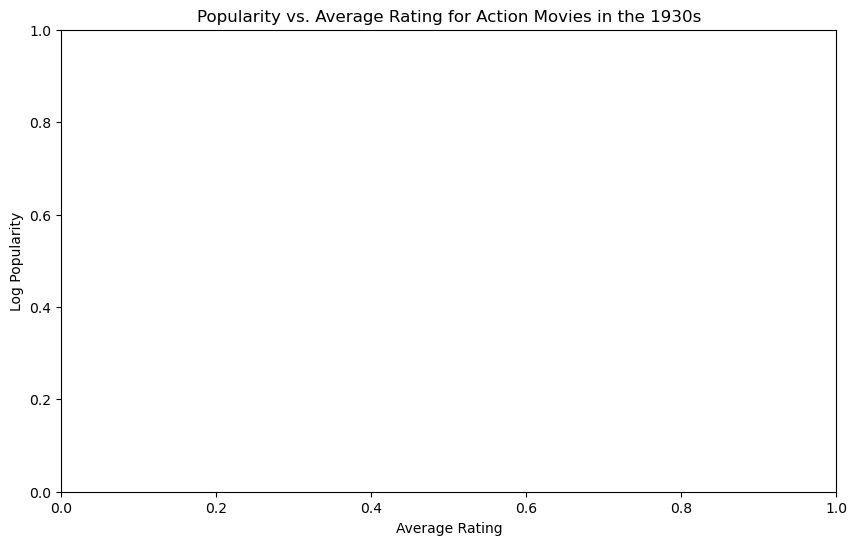

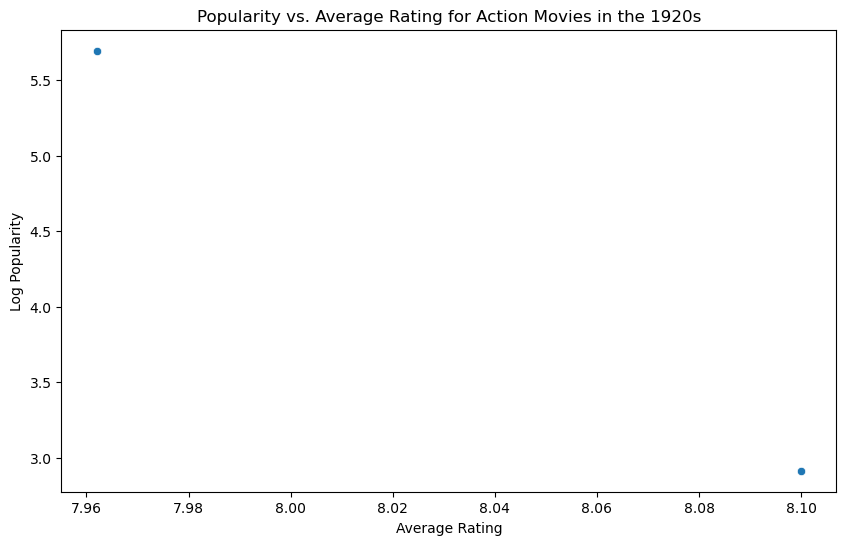

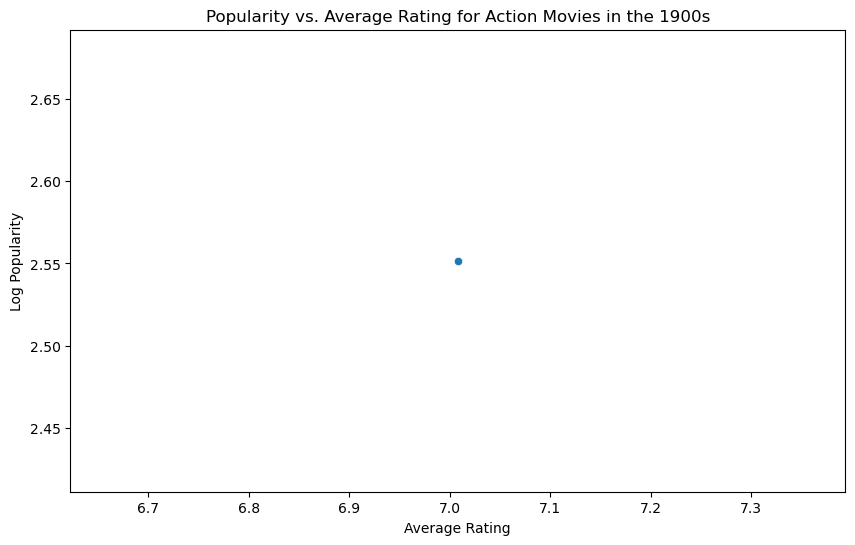

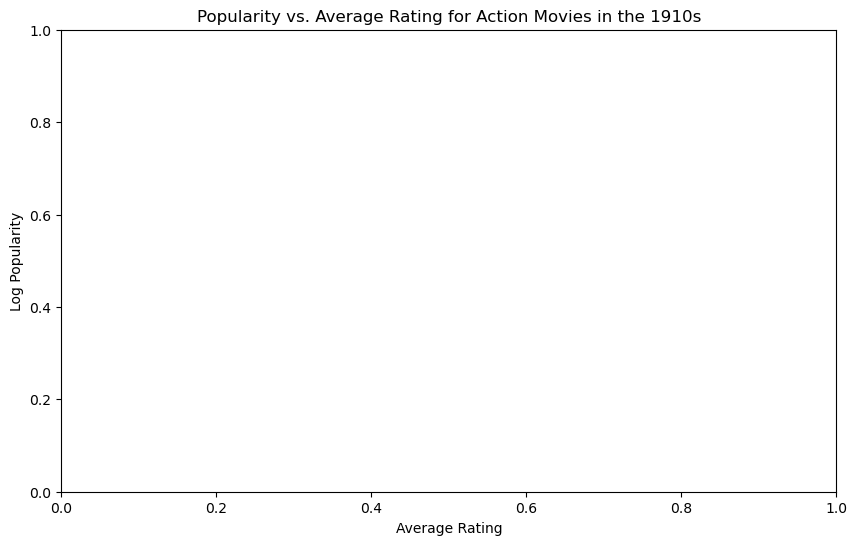

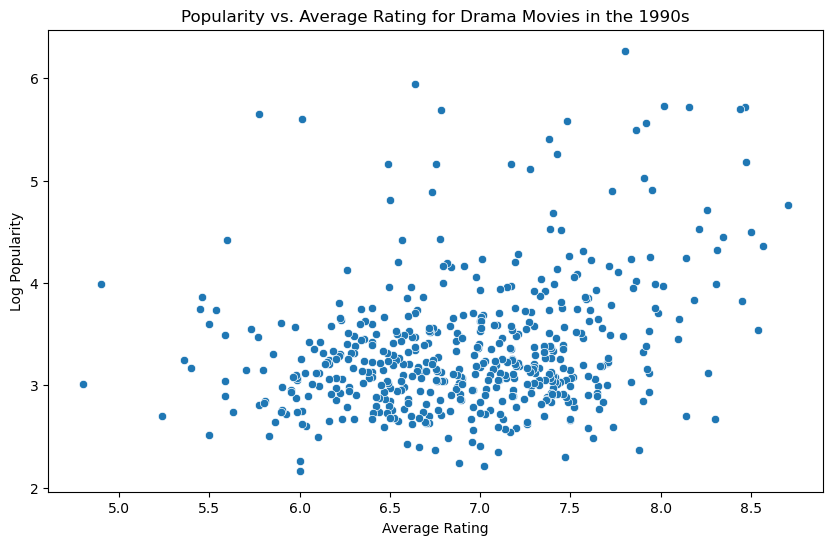

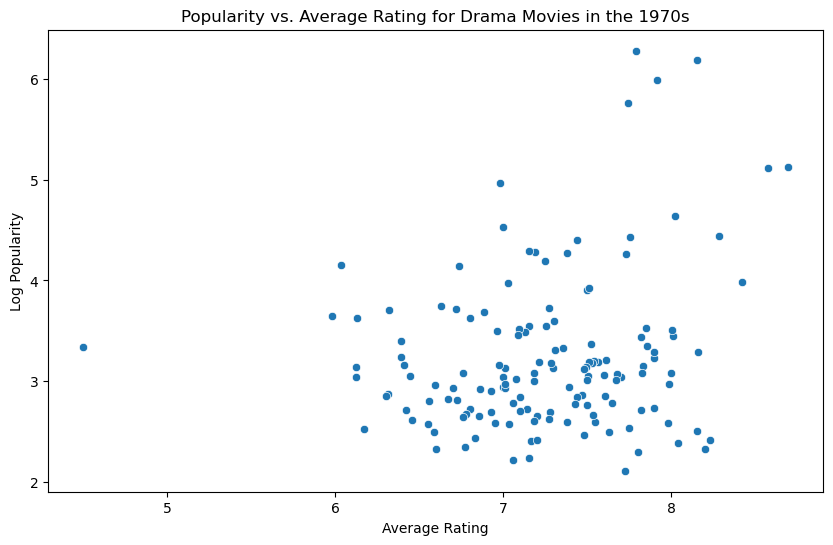

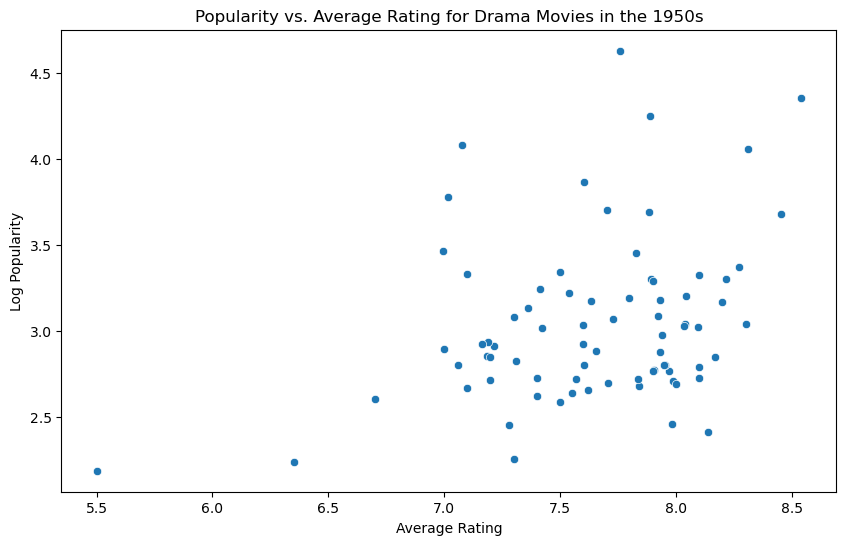

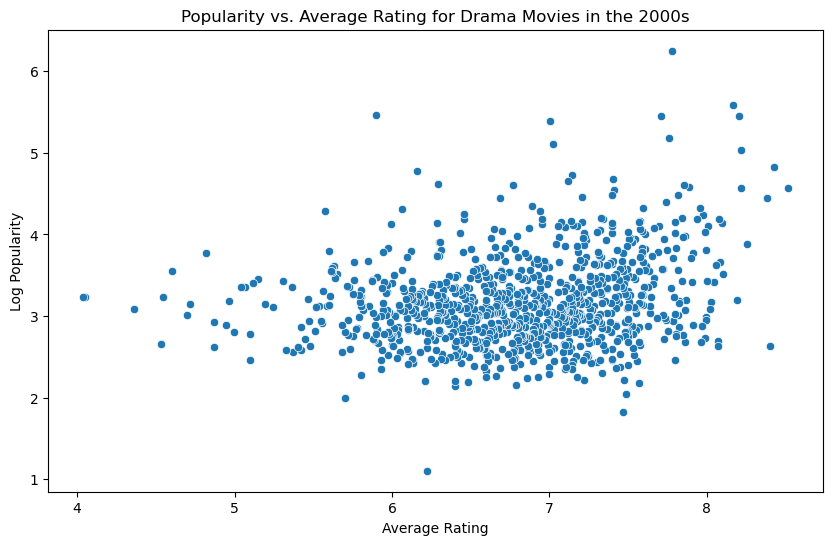

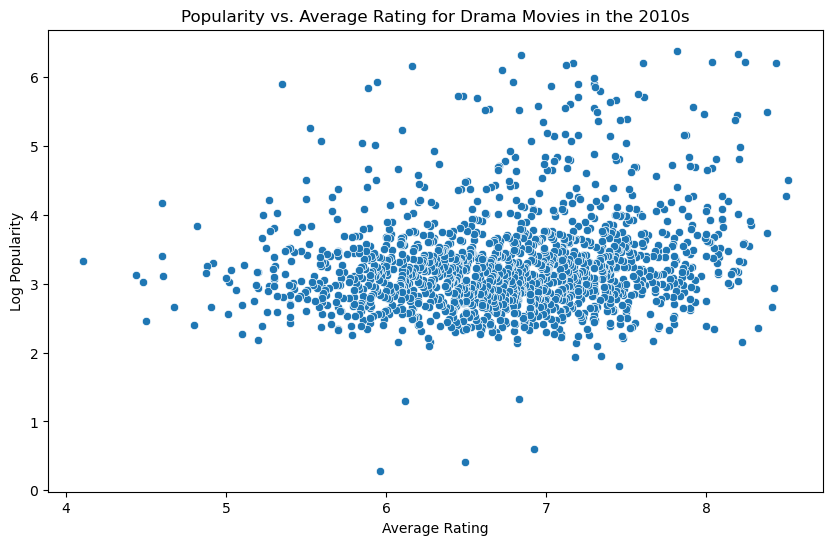

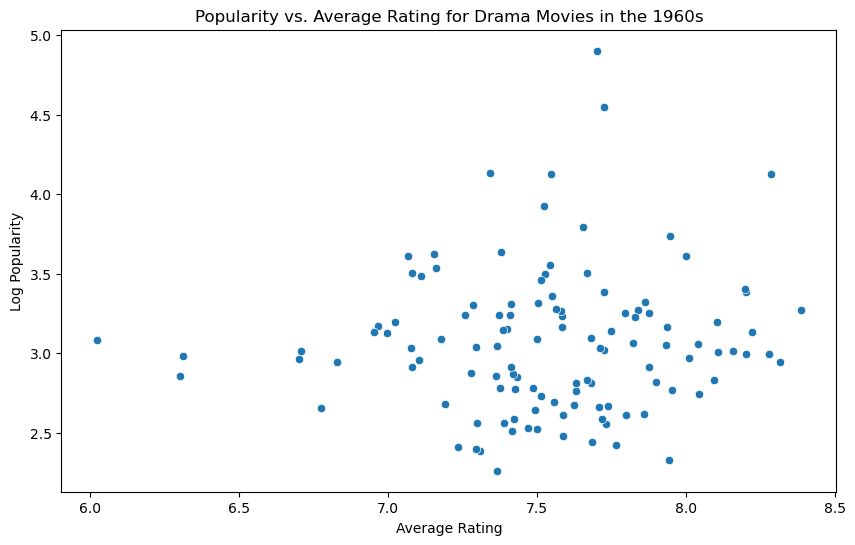

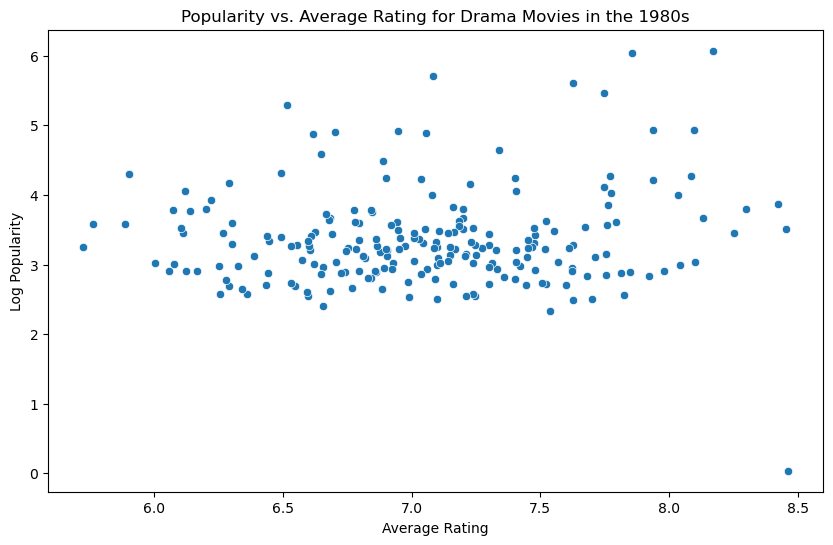

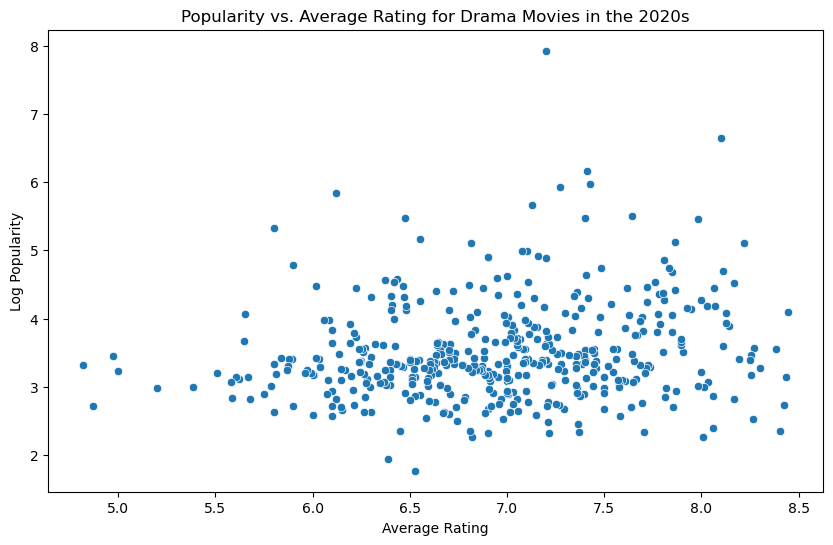

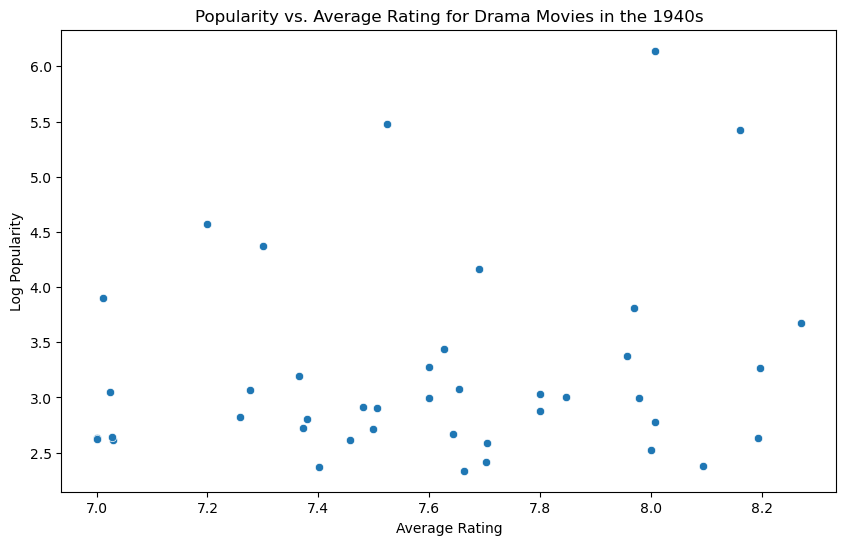

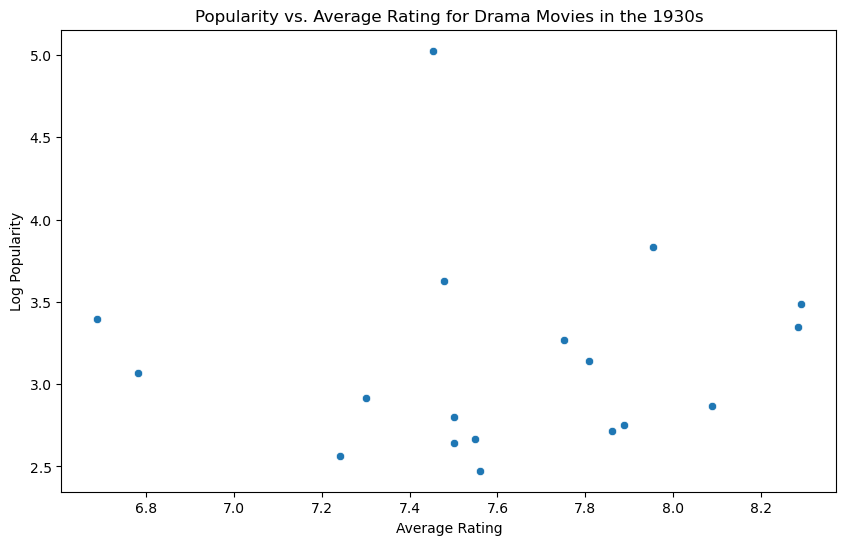

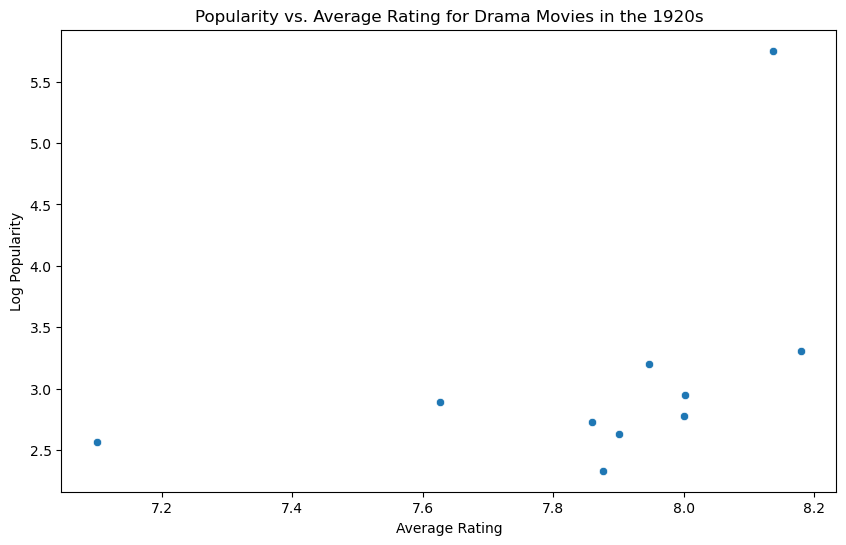

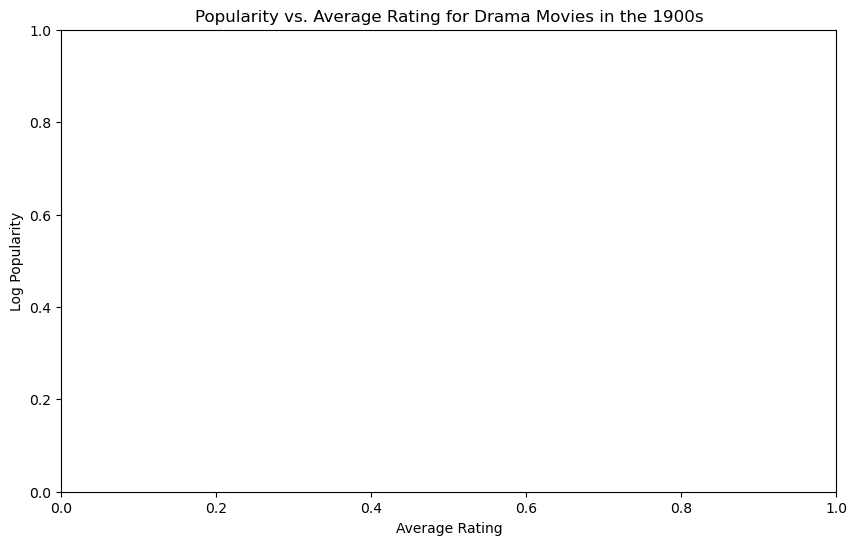

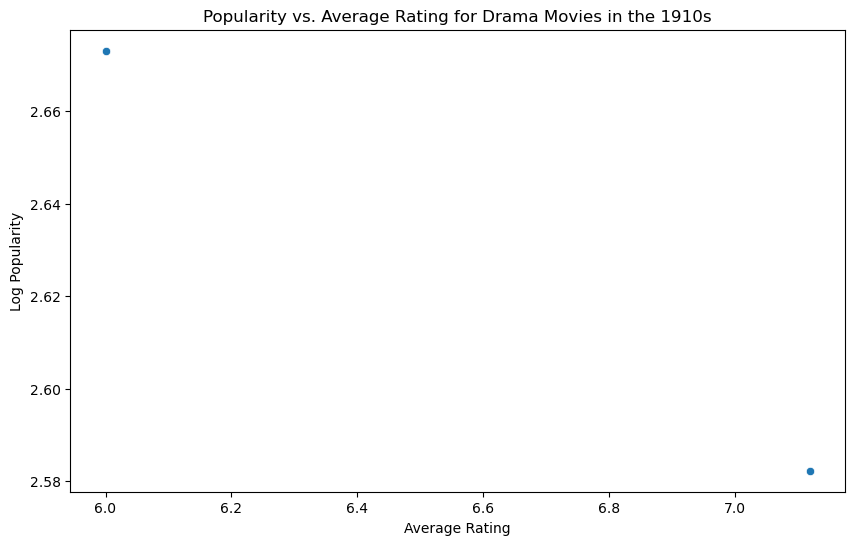

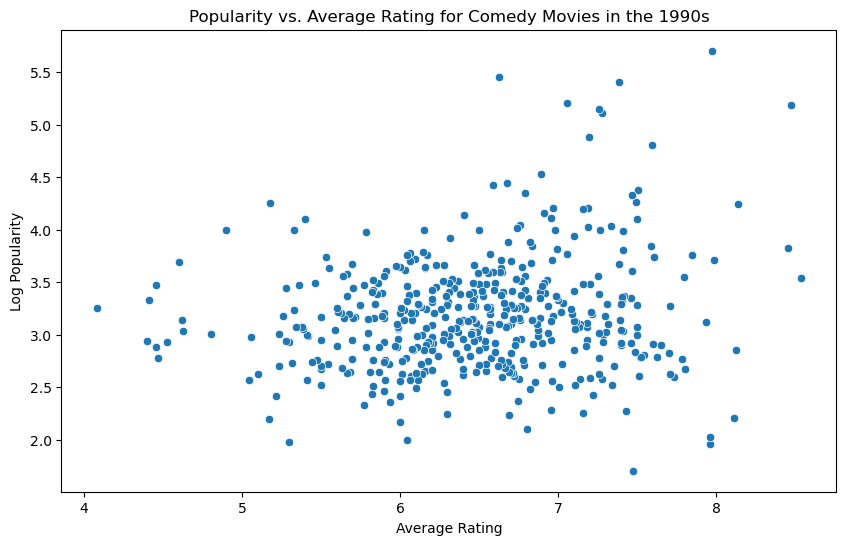

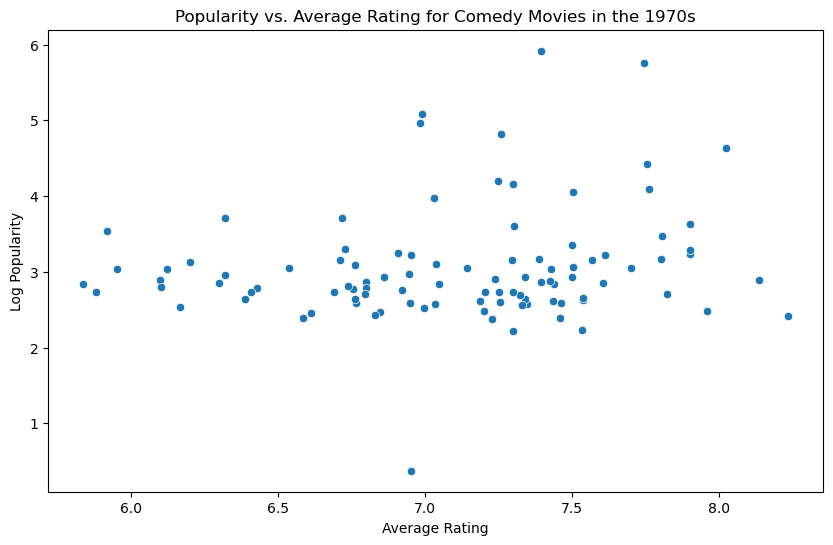

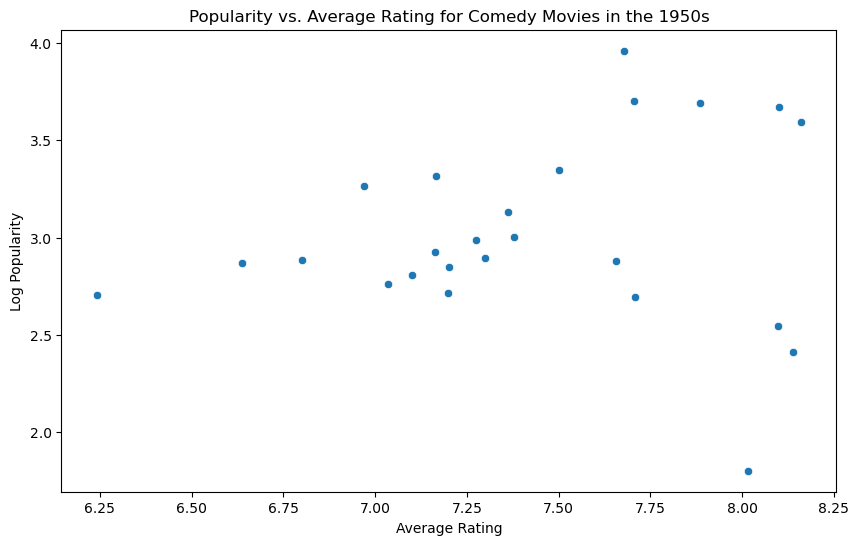

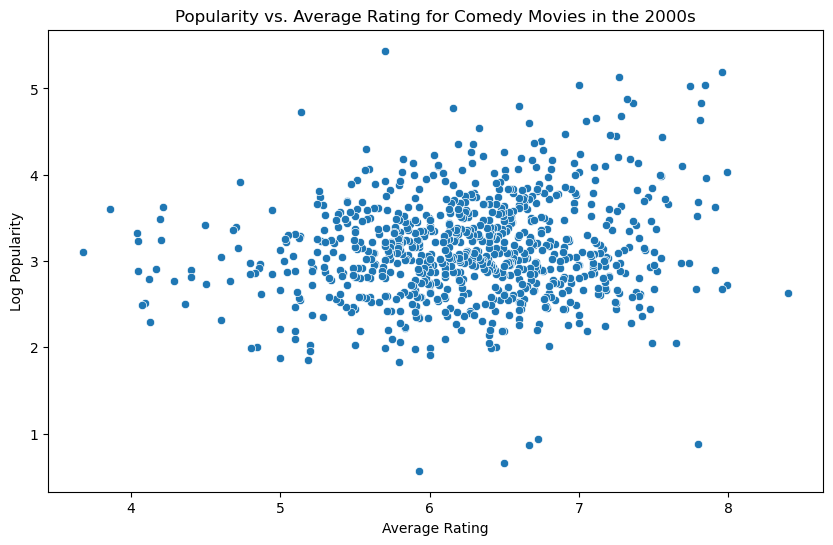

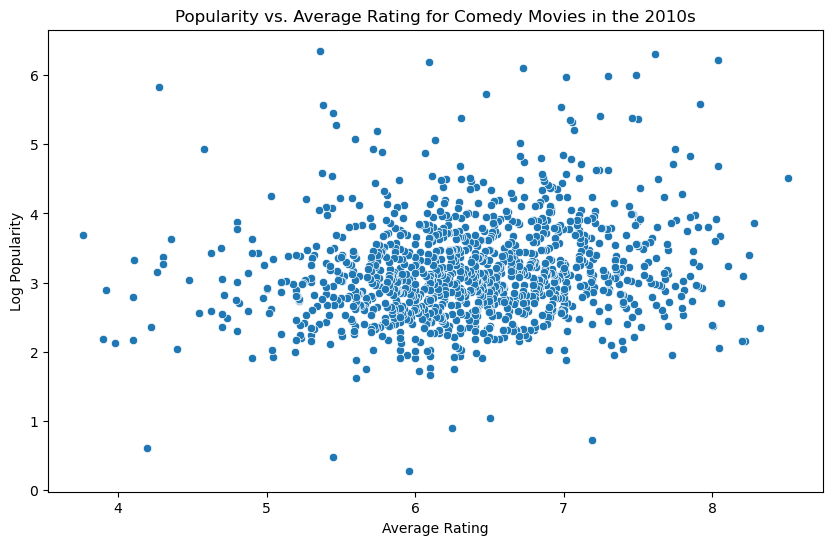

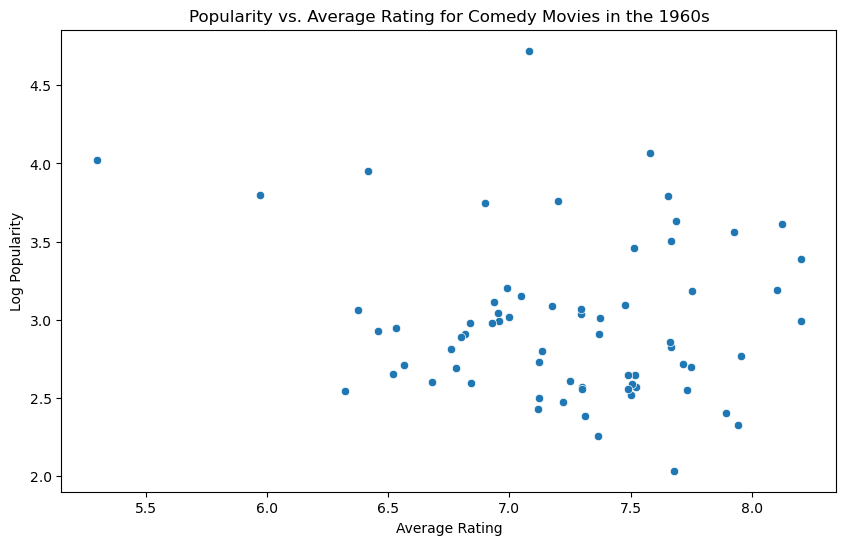

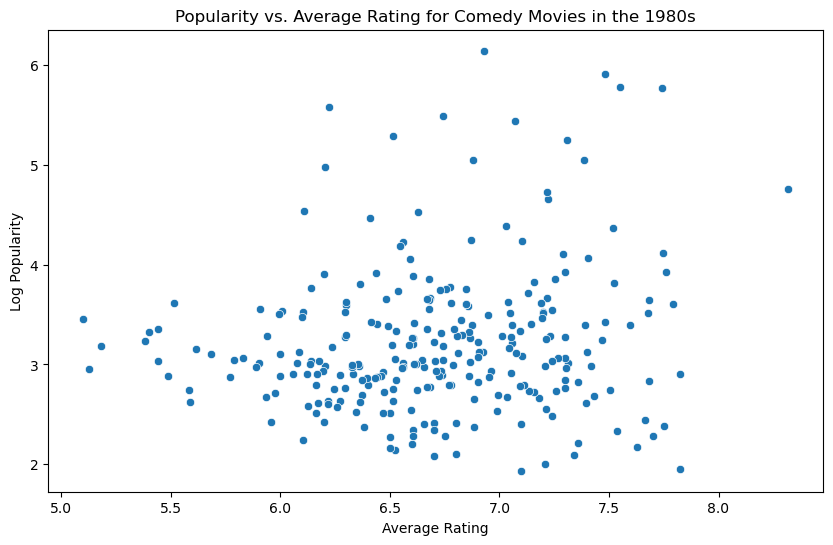

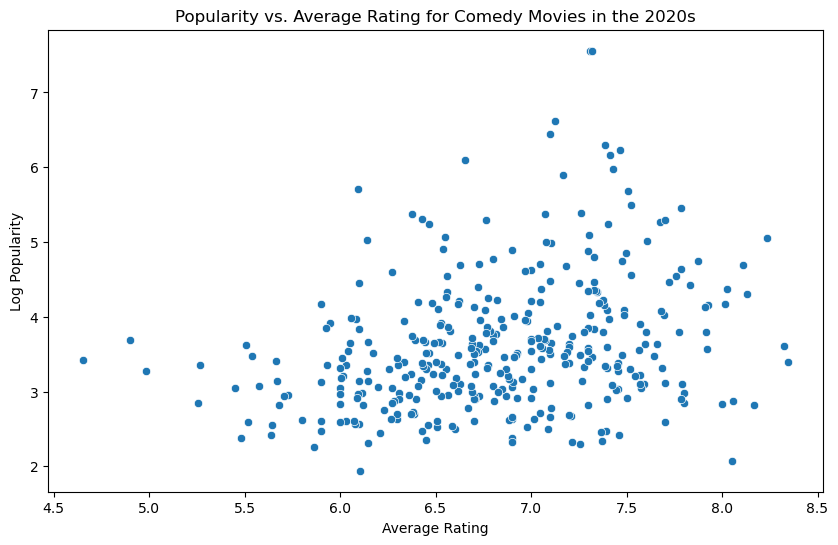

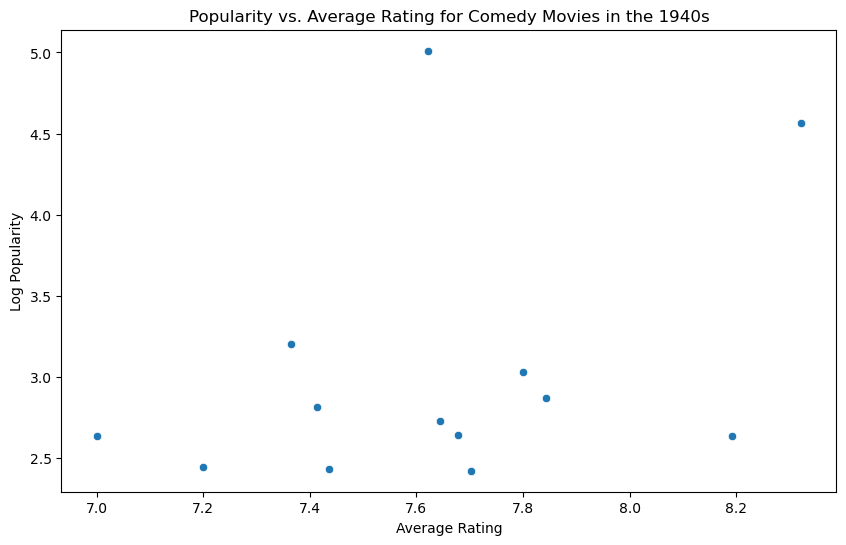

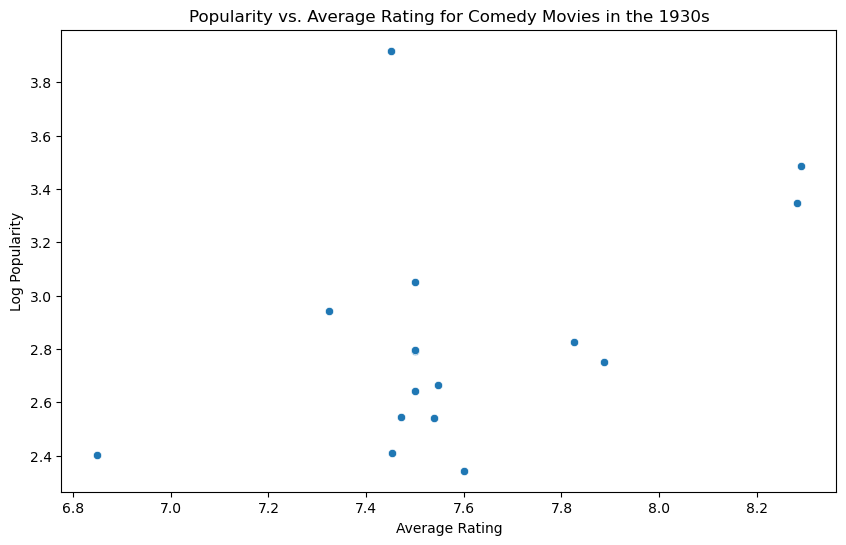

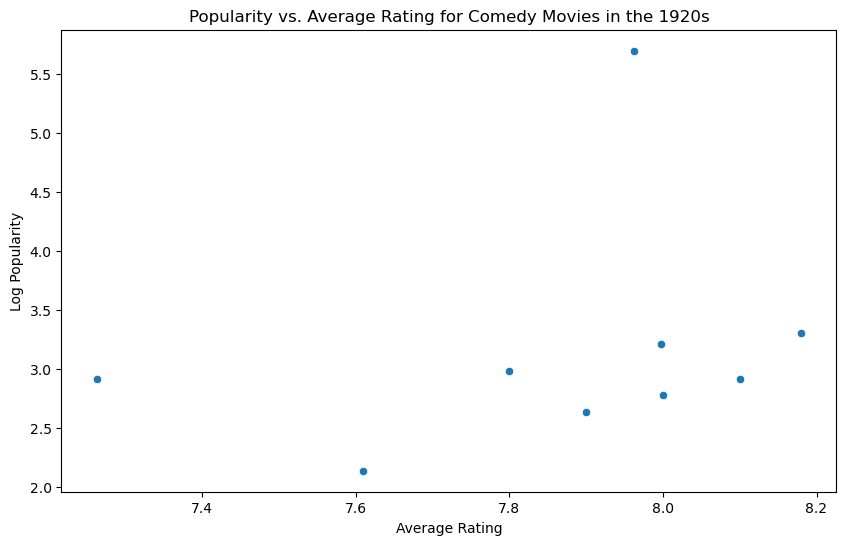

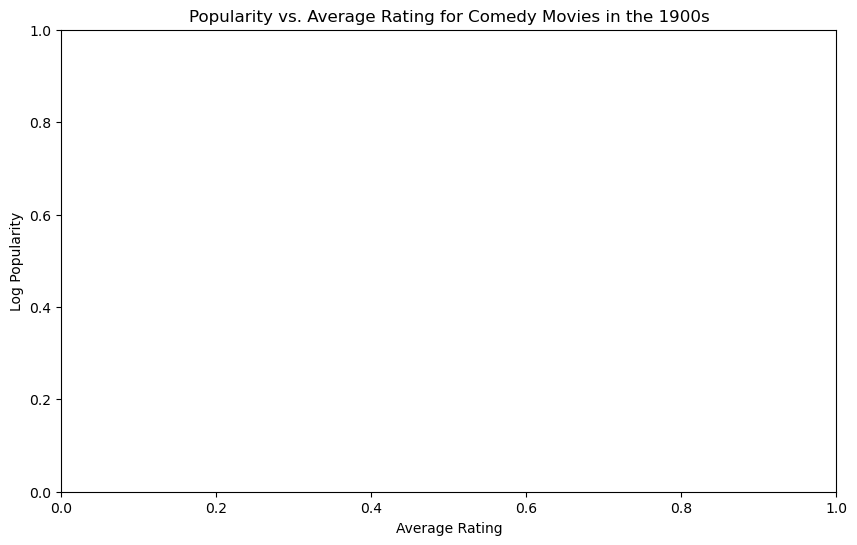

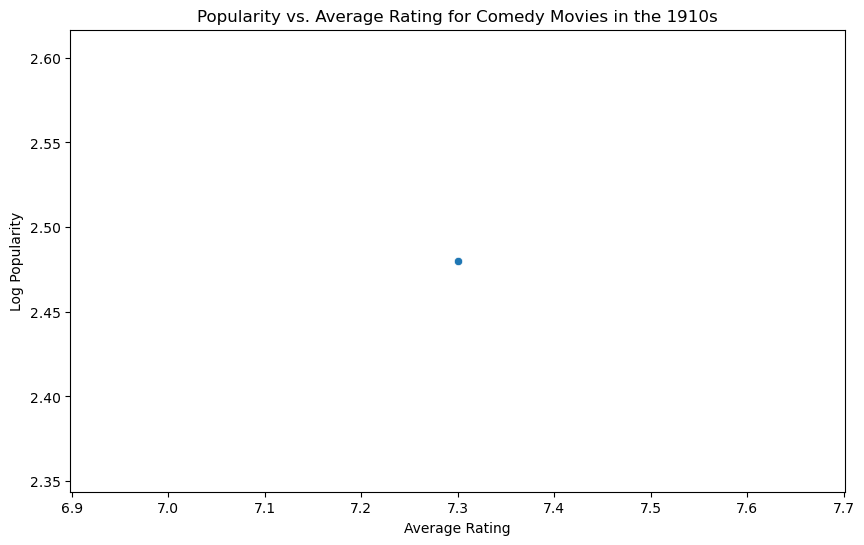

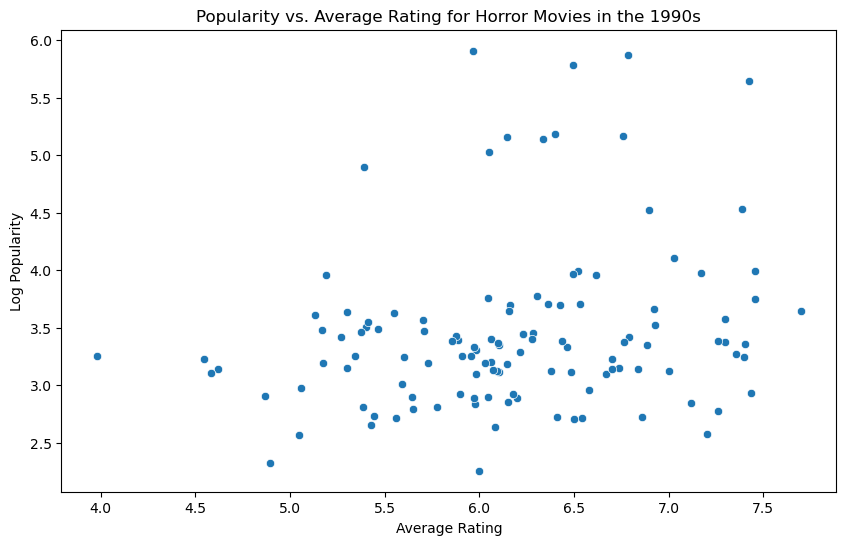

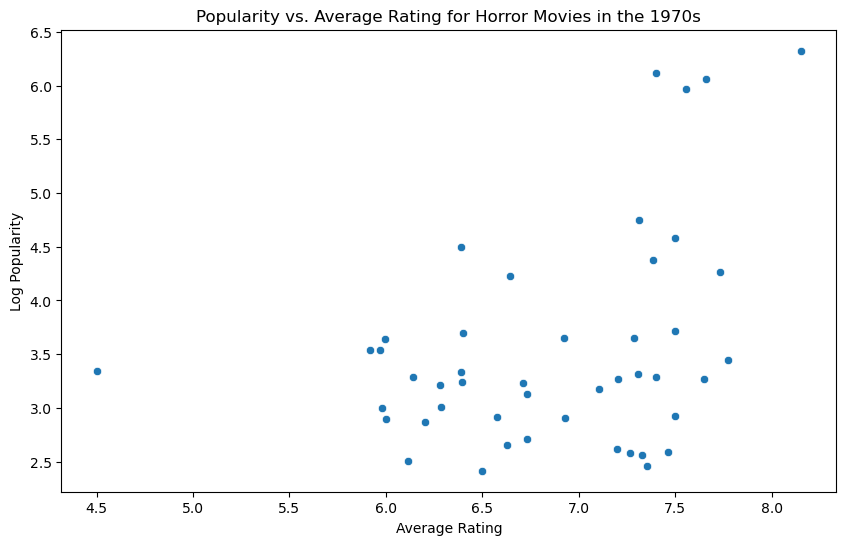

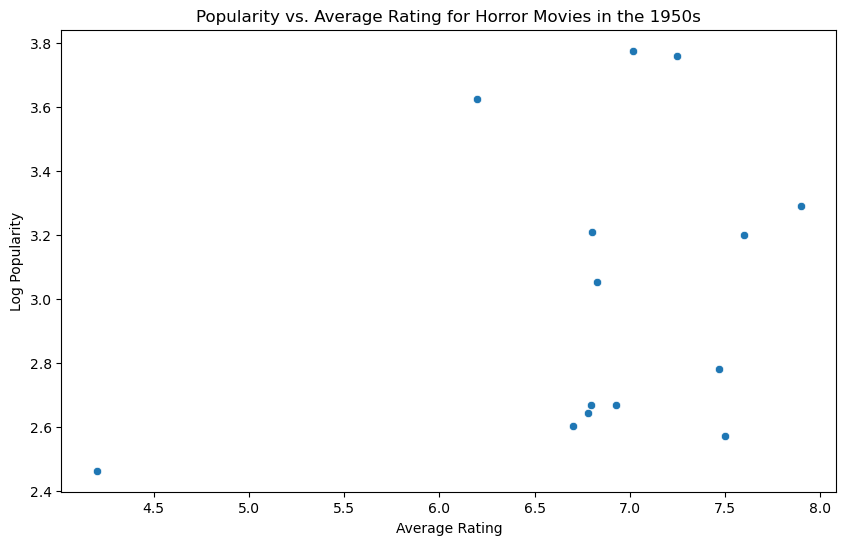

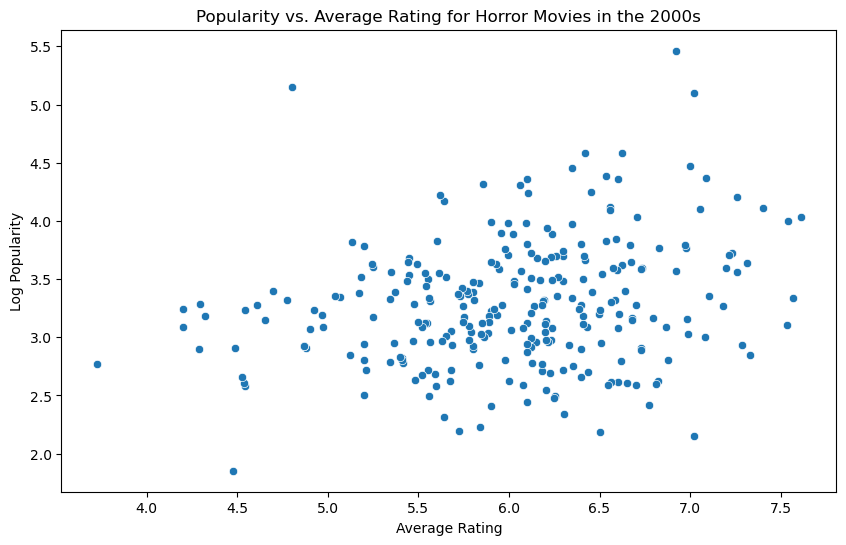

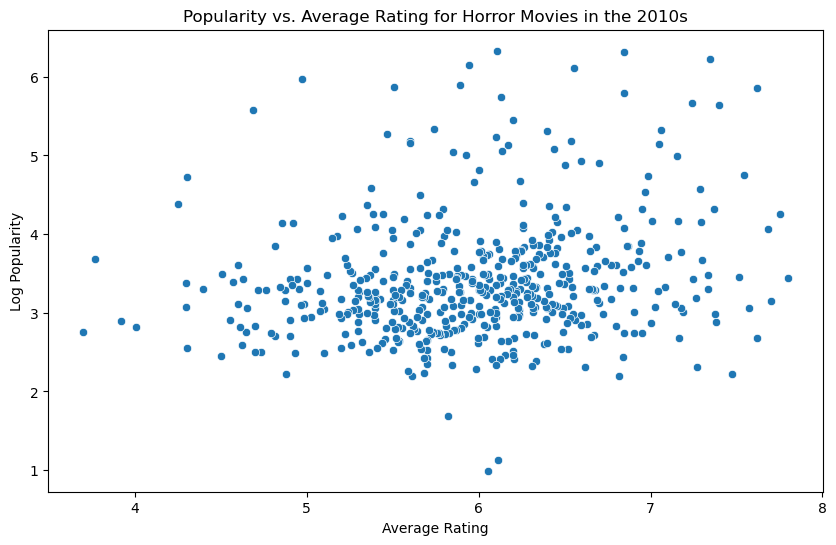

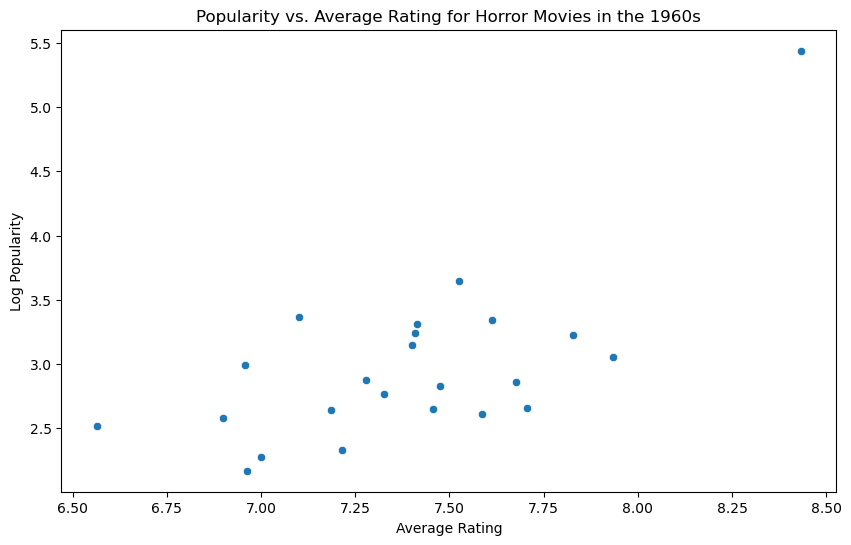

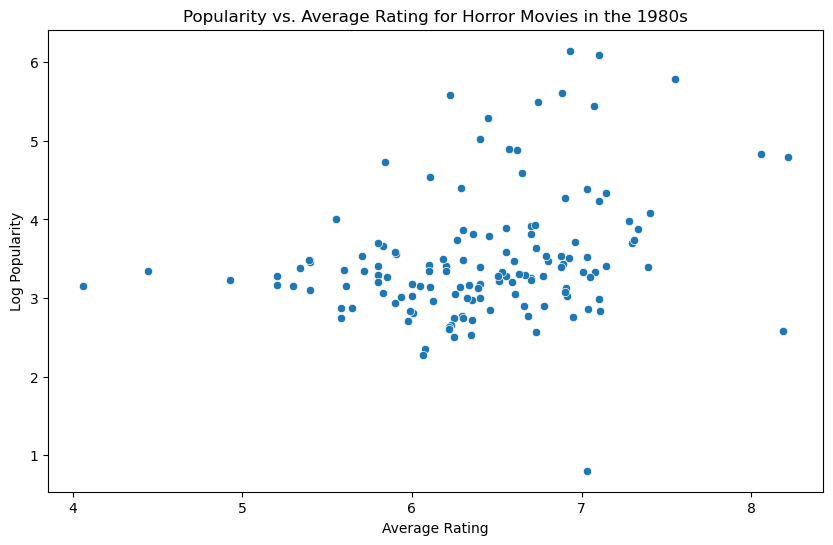

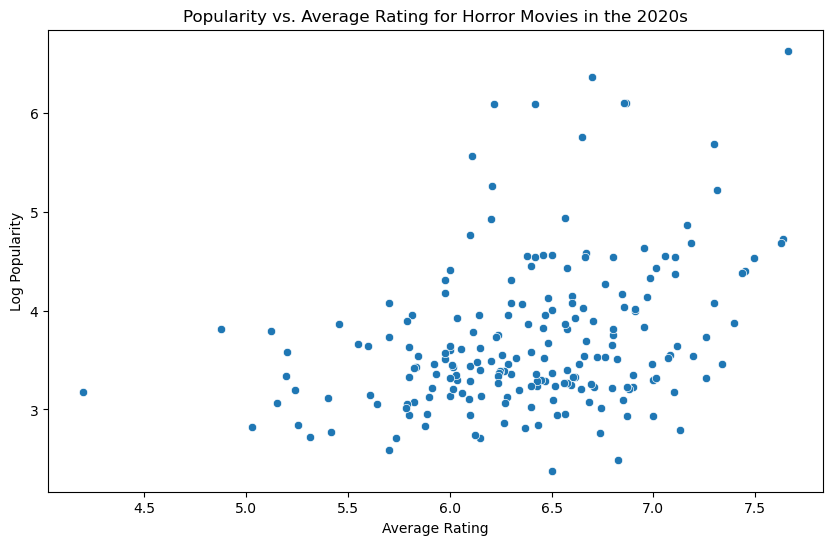

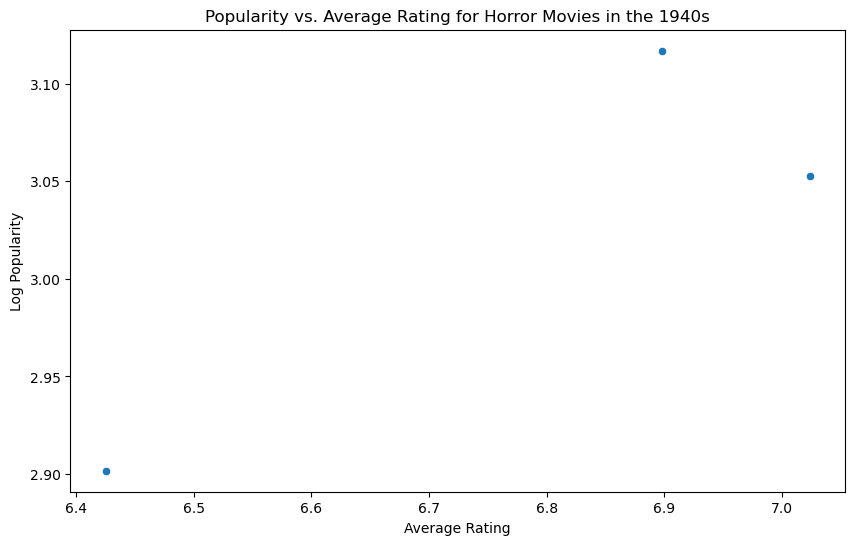

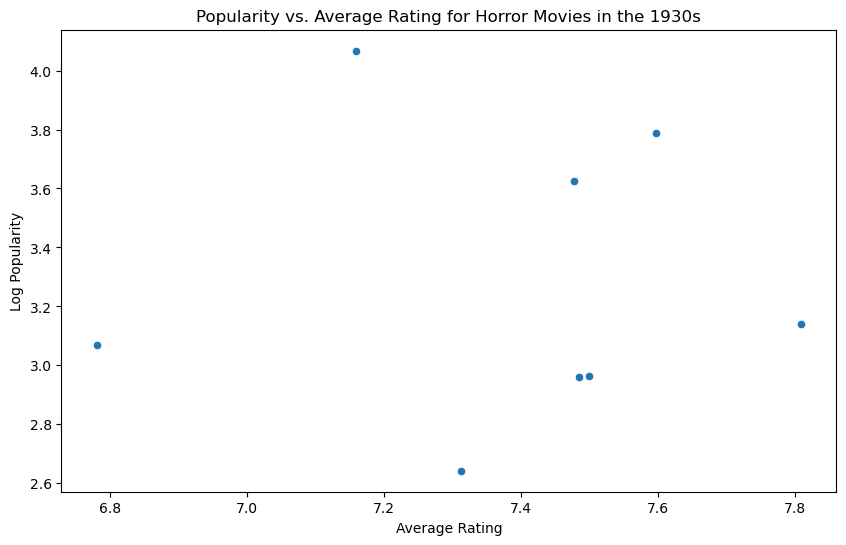

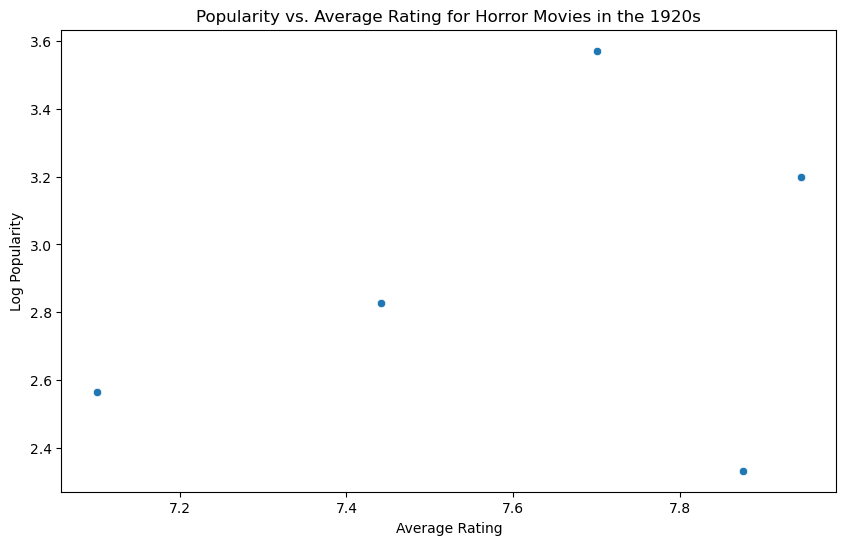

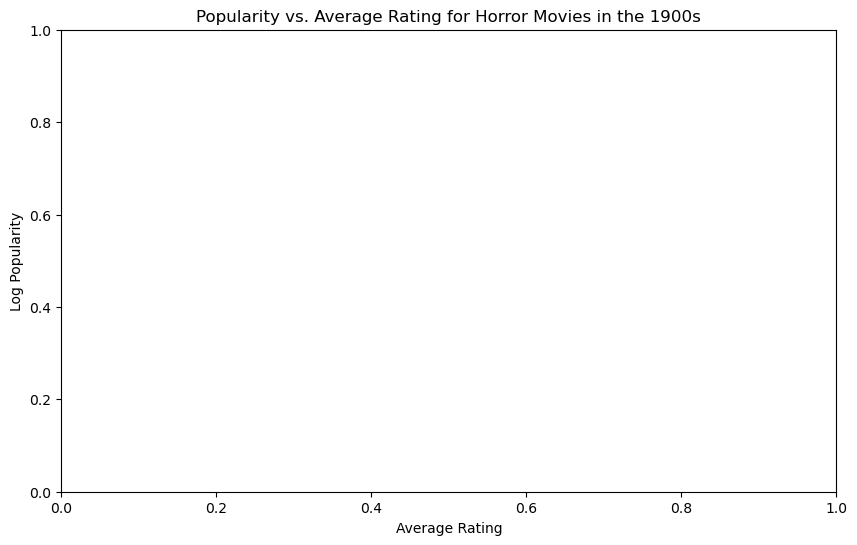

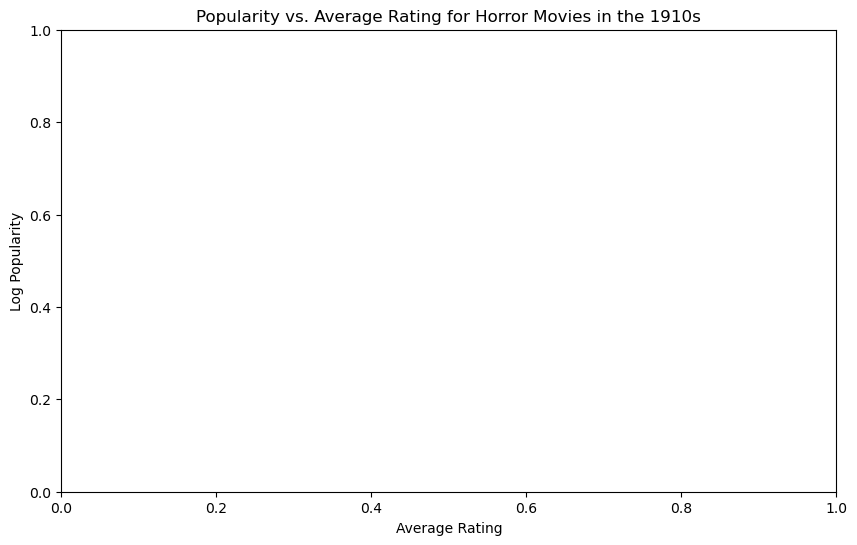

In [36]:
# Popularity vs. Average Rating by Decade for Each Genre
movies_df['decade'] = (movies_df['release_year'] // 10) * 10
decades = movies_df['decade'].dropna().unique()
for genre in genres:
    for decade in decades:
        decade_movies = movies_df[(movies_df['decade'] == decade) &
                                  (movies_df['genre_names'].str.contains(genre, na=False))]
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='vote_average', y='log_popularity', data=decade_movies)
        plt.title(f'Popularity vs. Average Rating for {genre} Movies in the {decade}s')
        plt.xlabel('Average Rating')
        plt.ylabel('Log Popularity')
        plt.show()

In [37]:
# Extracting the year and month from 'release_date'
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['release_month'] = movies_df['release_date'].dt.month

In [38]:
# Prepare Data for Modeling
features = ['vote_average', 'log_vote_count', 'release_year', 'release_month'] + list(genres_encoded.columns)
X = movies_df[features]
y = movies_df['log_popularity']

In [39]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Training and evaluating my linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - R-squared: {r2}')

Linear Regression - Mean Squared Error: 0.33856165816262884
Linear Regression - R-squared: 0.39919426883952913


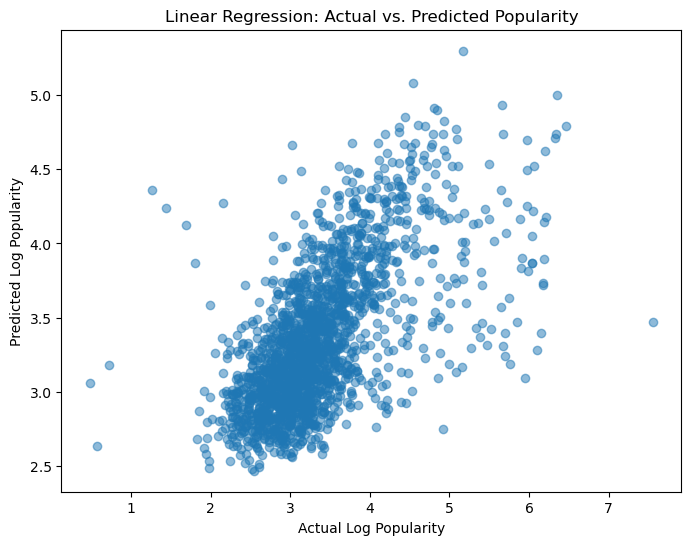

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Log Popularity')
plt.ylabel('Predicted Log Popularity')
plt.title('Linear Regression: Actual vs. Predicted Popularity')
plt.show()

In [43]:
# Training and evaluating my Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [44]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Squared Error: 0.2828412202559387
Random Forest - R-squared: 0.4980748054566724


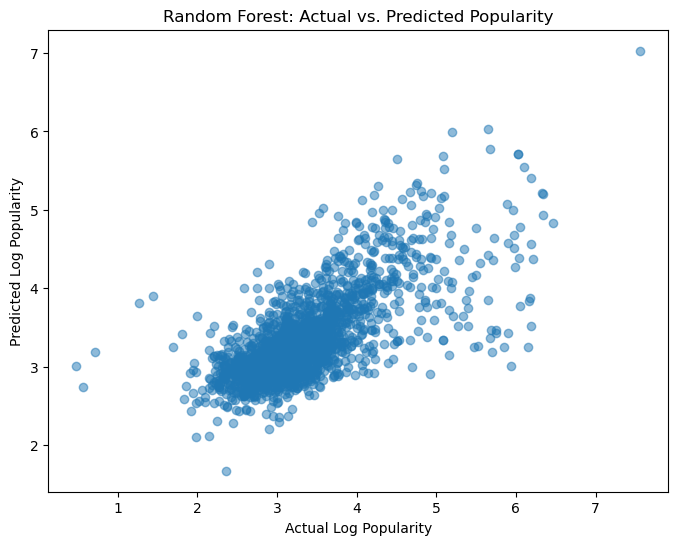

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Log Popularity')
plt.ylabel('Predicted Log Popularity')
plt.title('Random Forest: Actual vs. Predicted Popularity')
plt.show()

In [46]:
# Important features from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

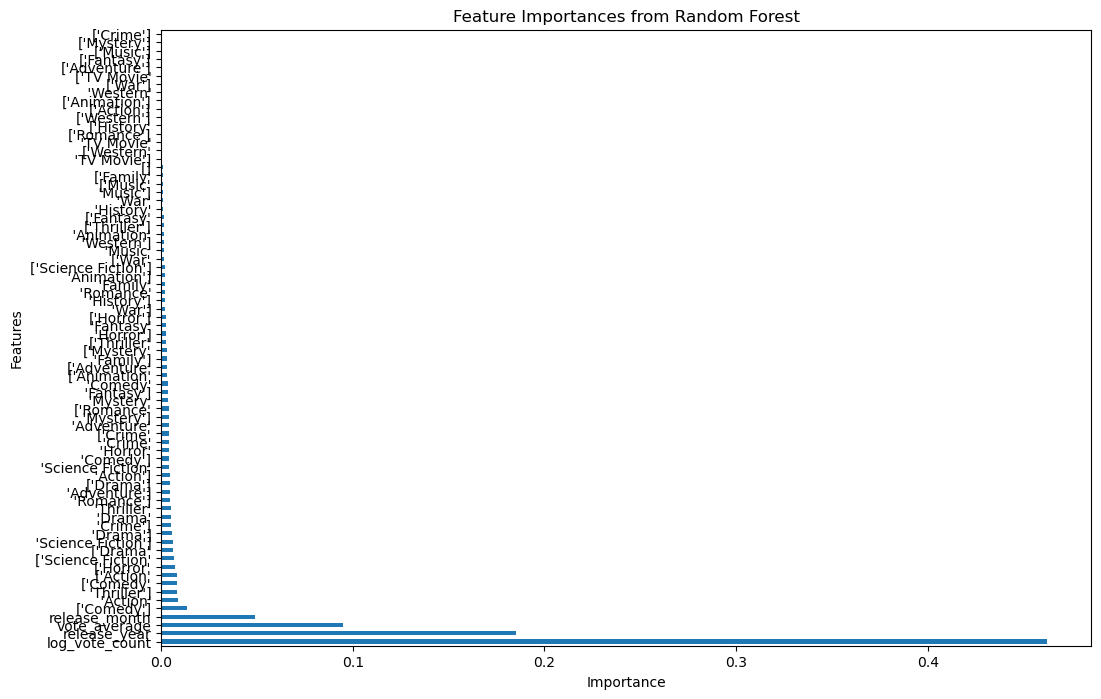

In [47]:
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

#Train Gradient Boosting Model for evaluation

In [49]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [50]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')

Gradient Boosting - Mean Squared Error: 0.2727896940236453
Gradient Boosting - R-squared: 0.5159120720864656


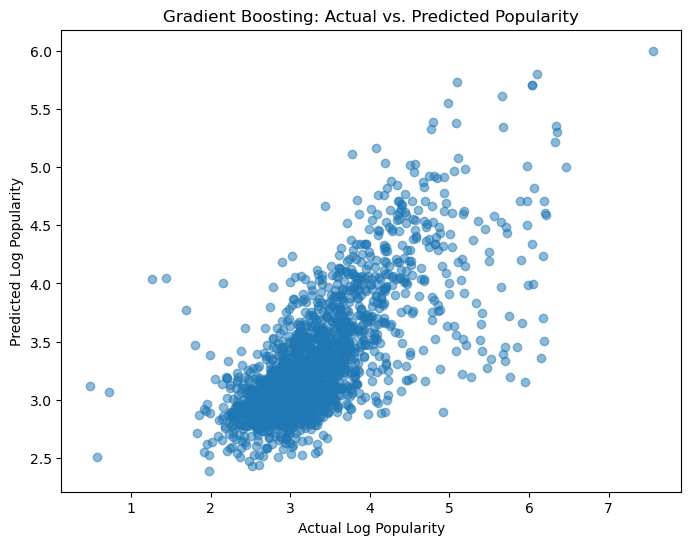

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Log Popularity')
plt.ylabel('Predicted Log Popularity')
plt.title('Gradient Boosting: Actual vs. Predicted Popularity')
plt.show()

In [52]:
# Hyperparameter tuning for my Random Forest Model using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [53]:
# Evaluating the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Best Random Forest - Mean Squared Error: {mse_best_rf}')
print(f'Best Random Forest - R-squared: {r2_best_rf}')

Best Random Forest - Mean Squared Error: 0.27574660546071766
Best Random Forest - R-squared: 0.5106647875960475


In [54]:
# Grouping by year and calculate the mean of popularity, vote count, and vote average
yearly_trends = movies_df.groupby('release_year').agg({
    'popularity': 'mean',
    'vote_count': 'mean',
    'vote_average': 'mean'
}).reset_index()

In [55]:
# Displaying the first few rows
print(yearly_trends.head())

   release_year  popularity  vote_count  vote_average
0          1902      20.963      1706.0         7.927
1          1903      11.828       584.0         7.008
2          1915      13.484       504.0         6.000
3          1916      12.227       321.0         7.120
4          1918      10.943       310.0         7.300


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


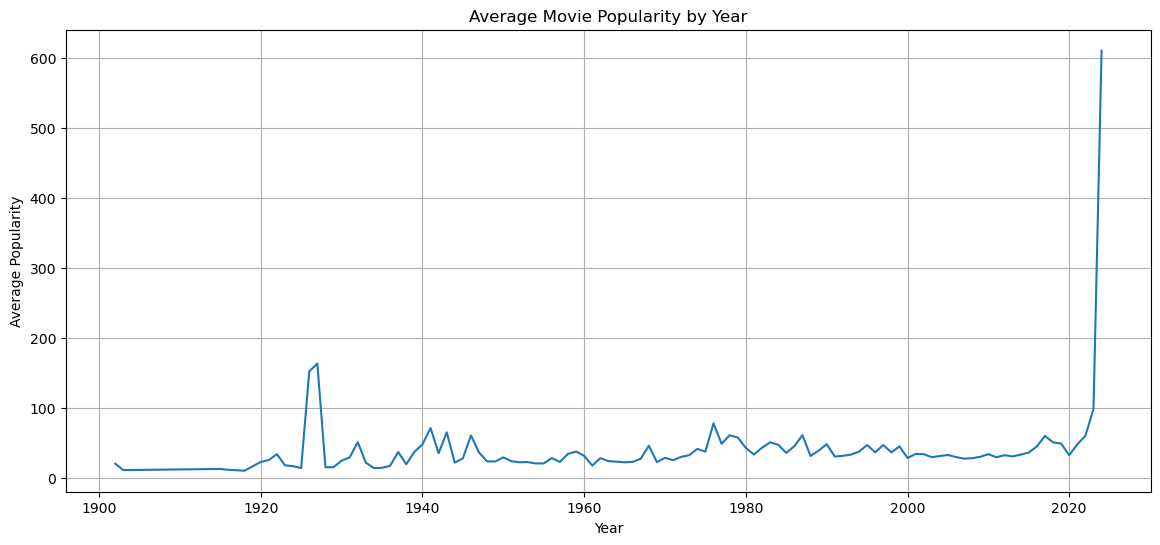

In [56]:
# Plotting the average popularity by year
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_year', y='popularity', data=yearly_trends)
plt.title('Average Movie Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


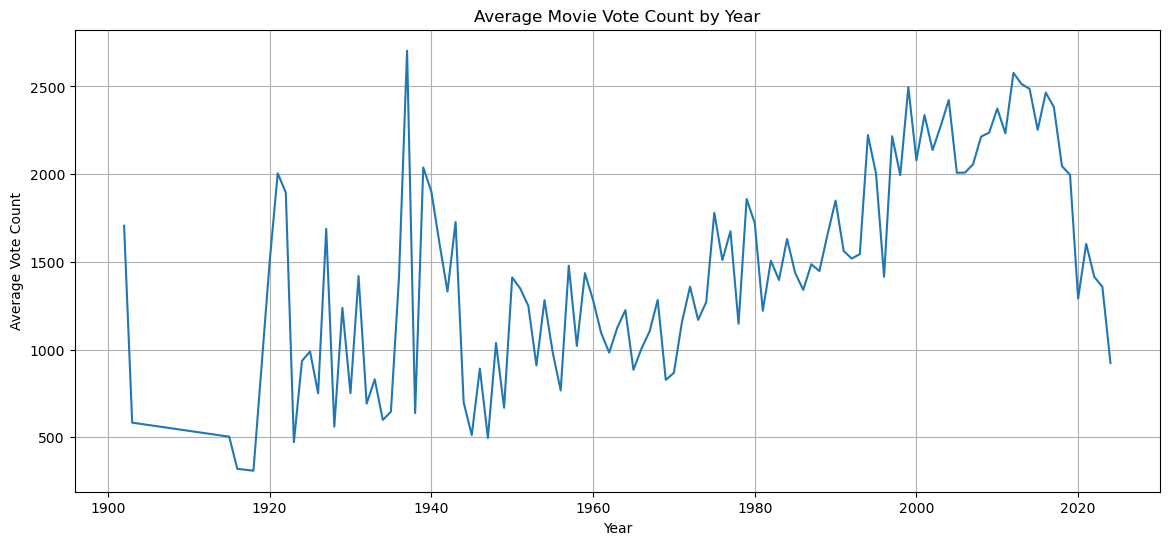

In [57]:
# Plotting the average vote count by year
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_year', y='vote_count', data=yearly_trends)
plt.title('Average Movie Vote Count by Year')
plt.xlabel('Year')
plt.ylabel('Average Vote Count')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


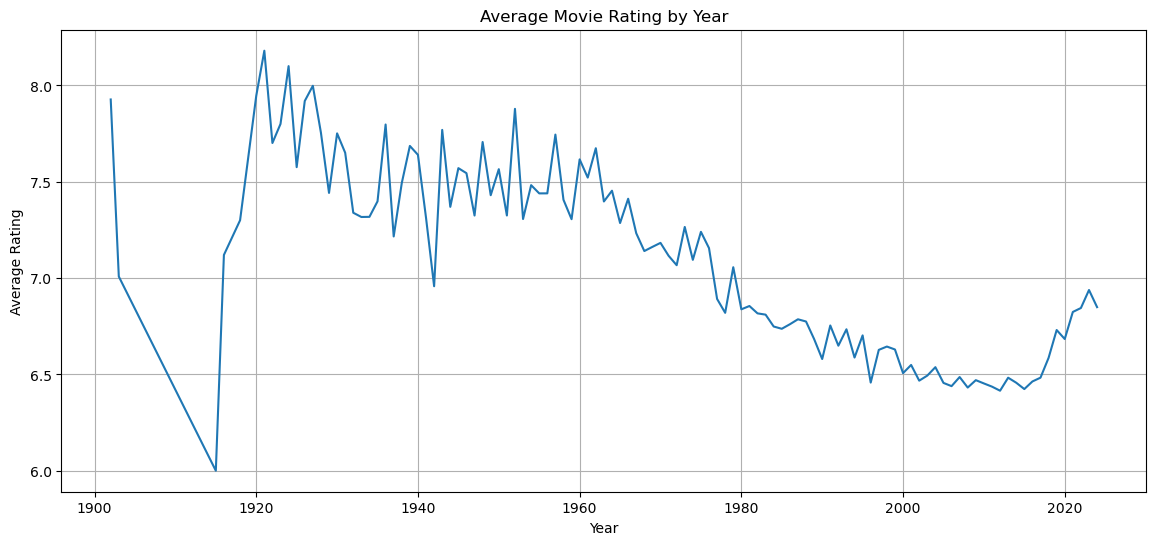

In [58]:
# Plotting the average vote average by year
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_year', y='vote_average', data=yearly_trends)
plt.title('Average Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [59]:
# Grouping by month and calculate the mean of popularity
monthly_trends = movies_df.groupby('release_month').agg({
    'popularity': 'mean',
    'vote_count': 'mean',
    'vote_average': 'mean'
}).reset_index()

In [60]:
# Displaying the first few rows
print(monthly_trends.head())

   release_month  popularity   vote_count  vote_average
0              1   35.041960  1355.470803      6.474354
1              2   38.614401  1712.469417      6.550097
2              3   49.651451  1877.763780      6.607441
3              4   49.836220  1789.608498      6.514387
4              5   54.767445  2632.265723      6.674934


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


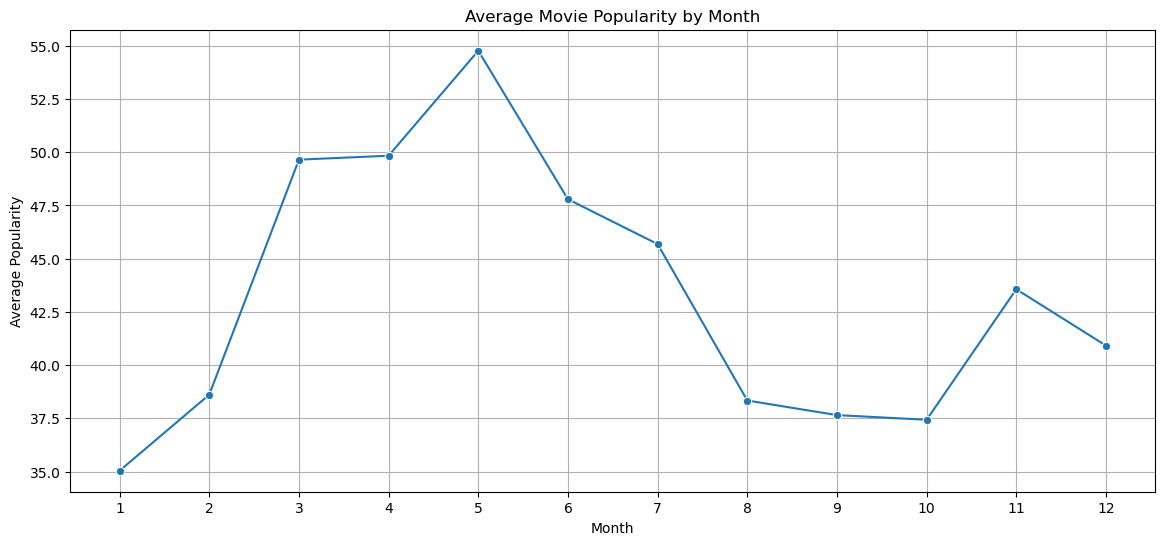

In [61]:
# Plotting the average popularity by month
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_month', y='popularity', data=monthly_trends, marker='o')
plt.title('Average Movie Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


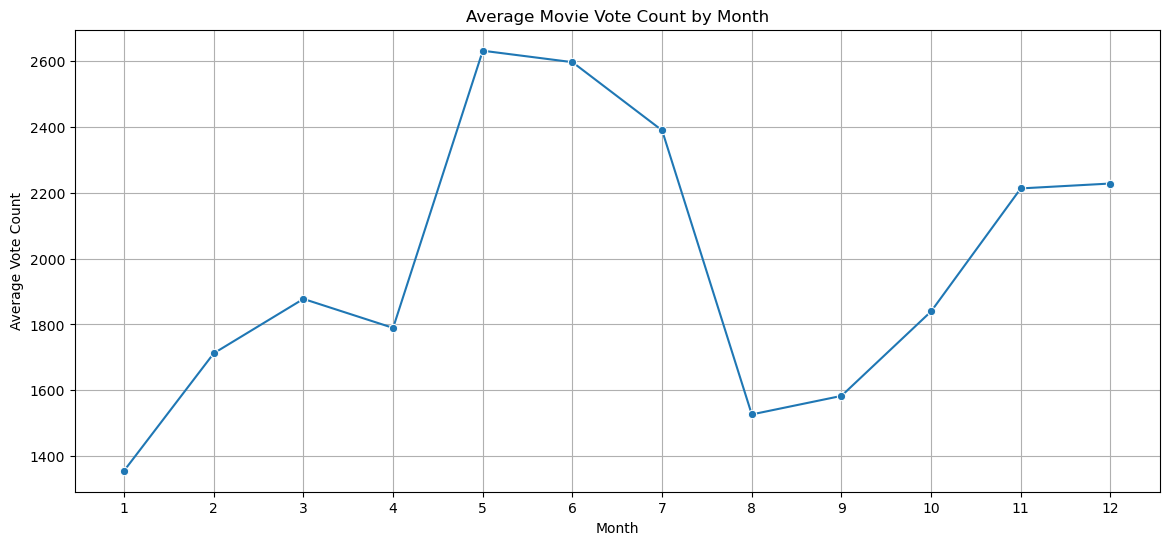

In [62]:
# Plotting the average vote count by month
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_month', y='vote_count', data=monthly_trends, marker='o')
plt.title('Average Movie Vote Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Vote Count')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


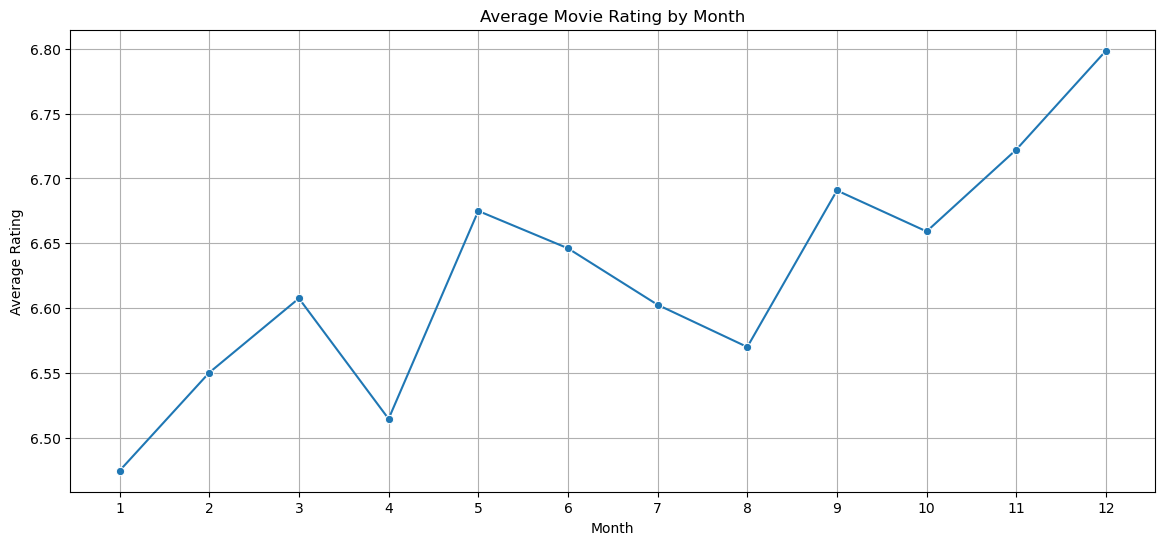

In [63]:
# Plotting the average vote average by month
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_month', y='vote_average', data=monthly_trends, marker='o')
plt.title('Average Movie Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [64]:
# Select genres to analyze
genres = ['Action', 'Drama', 'Comedy', 'Horror']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


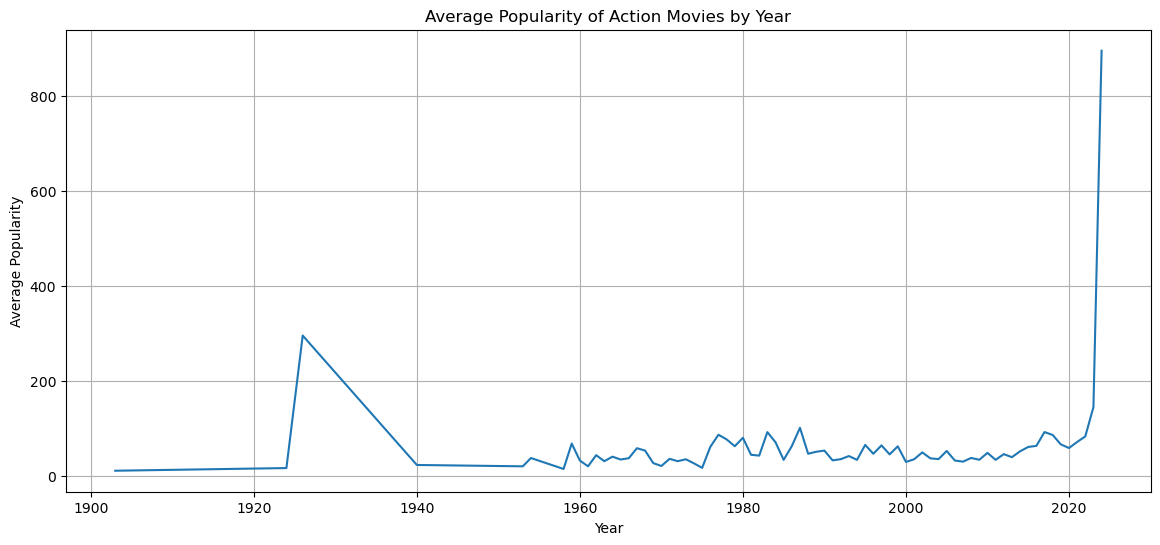

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


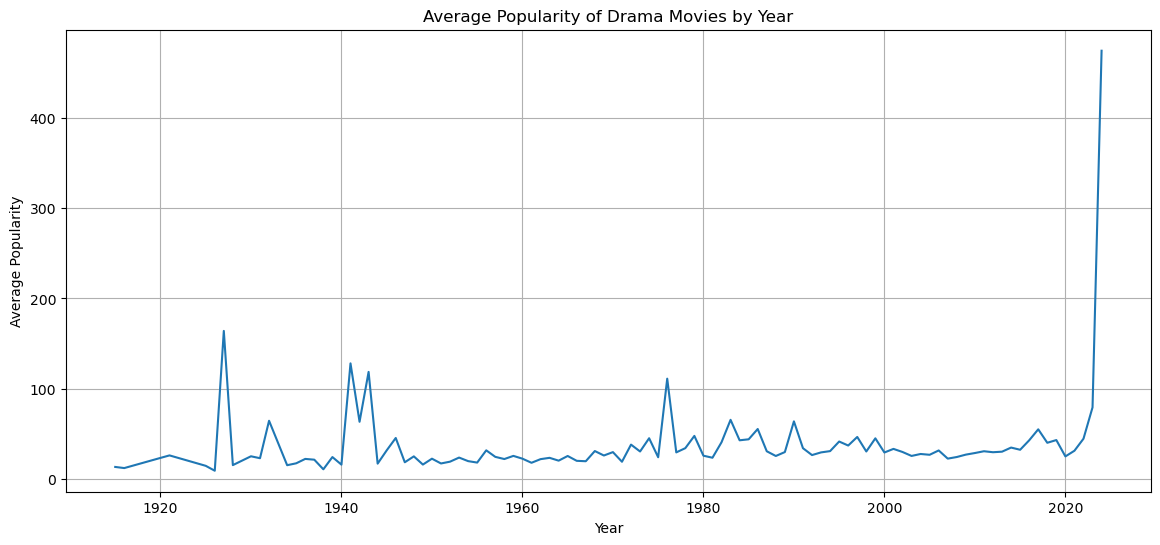

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


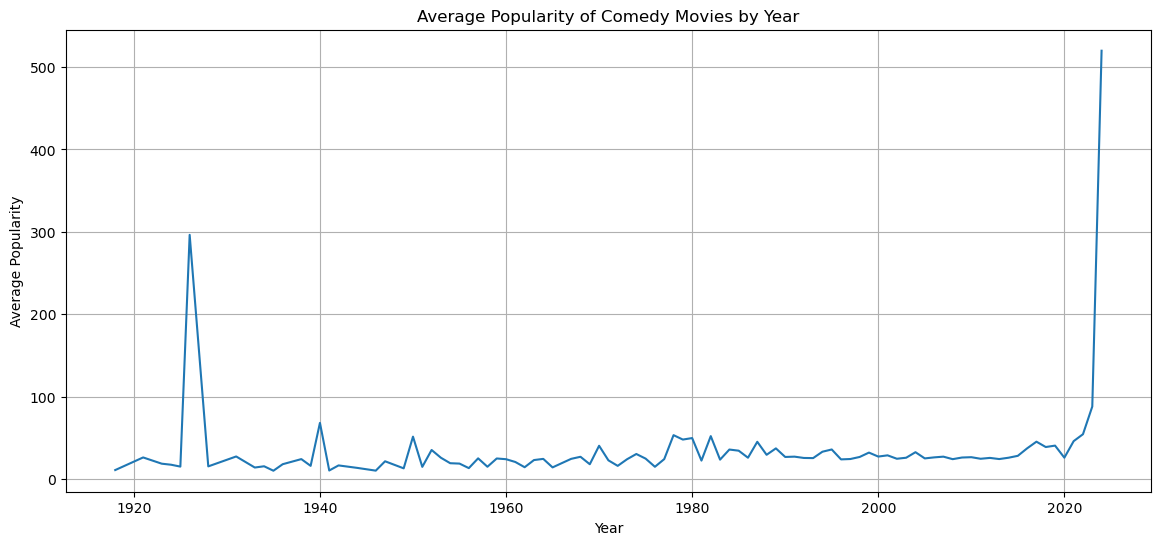

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


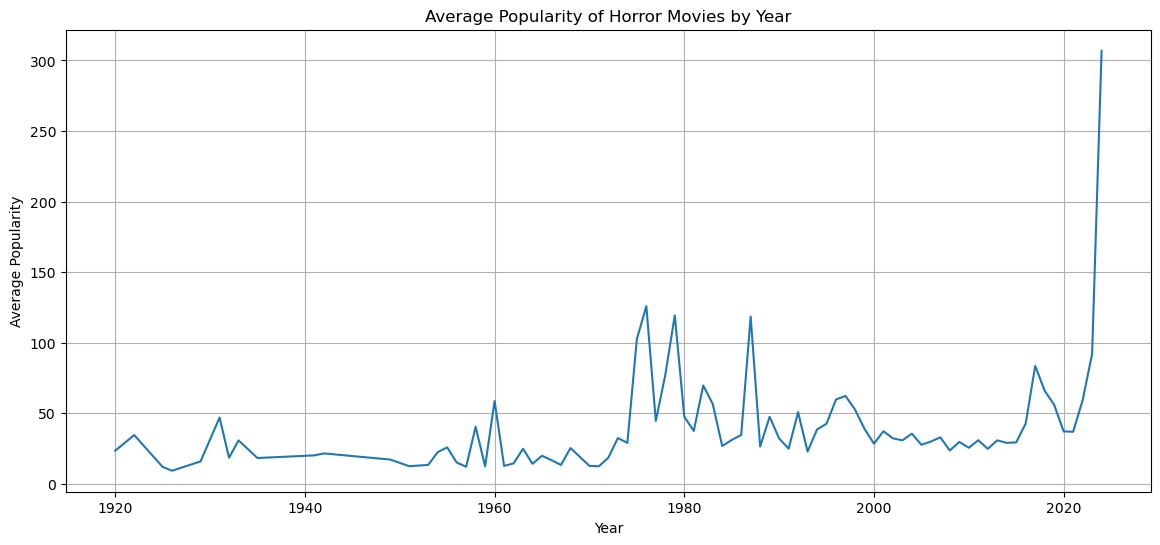

In [65]:
# Plotting trends for each genre by year
for genre in genres:
    genre_trends = movies_df[movies_df['genre_names'].str.contains(genre, na=False)]
    genre_yearly_trends = genre_trends.groupby('release_year').agg({
        'popularity': 'mean',
        'vote_count': 'mean',
        'vote_average': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='release_year', y='popularity', data=genre_yearly_trends)
    plt.title(f'Average Popularity of {genre} Movies by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Popularity')
    plt.grid(True)
    plt.show()